In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-2


In [2]:
from src.preprocessing import (
    check_types,
    fill_nans_with_median,
    get_correlations,
    get_correlations_pair_matrix,
    dim_red
)
from src.visualizations import (
    visualize_feature_dists,
    plot_correlation_coefficients,
    heatmap_correlations,
    pairplot
)

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data")
print(DATA_DIR)

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-2/data


In [5]:
df = pd.read_csv(os.path.join(DATA_DIR, "breast_cancer.csv"))

In [6]:
len(df.columns) == len(set(df.columns))

True

In [7]:
df["diagnosis"].value_counts()

diagnosis
B    321
M    191
Name: count, dtype: int64

In [8]:
for col in df.columns:
    if " " in col:
        print(f"Column name '{col}' contains a space.")

Column name 'concave points_mean' contains a space.
Column name 'concave points_se' contains a space.
Column name 'concave points_worst' contains a space.


In [9]:
for col in df.columns:
    if " " in col:
        df.rename(columns={col: col.replace(" ", "_")}, inplace=True)
list(df.columns)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [10]:
_ = check_types(df, print_summary=True)

Column <id> is of type {<class 'int'>} and does not have NaN values
Column <diagnosis> is of type {<class 'str'>} and does not have NaN values
Column <radius_mean> is of type {<class 'float'>} and has NaN 7 values
Column <texture_mean> is of type {<class 'float'>} and has NaN 5 values
Column <perimeter_mean> is of type {<class 'float'>} and has NaN 5 values
Column <area_mean> is of type {<class 'float'>} and has NaN 4 values
Column <smoothness_mean> is of type {<class 'float'>} and has NaN 6 values
Column <compactness_mean> is of type {<class 'float'>} and has NaN 1 values
Column <concavity_mean> is of type {<class 'float'>} and has NaN 10 values
Column <concave_points_mean> is of type {<class 'float'>} and has NaN 8 values
Column <symmetry_mean> is of type {<class 'float'>} and has NaN 5 values
Column <fractal_dimension_mean> is of type {<class 'float'>} and has NaN 3 values
Column <radius_se> is of type {<class 'float'>} and has NaN 2 values
Column <texture_se> is of type {<class 'fl

In [11]:
df = df.drop(columns=["id"])
df = df.sort_index(axis=1)
target = df.pop("diagnosis")
target = target.map({"M": 1, "B": 0})

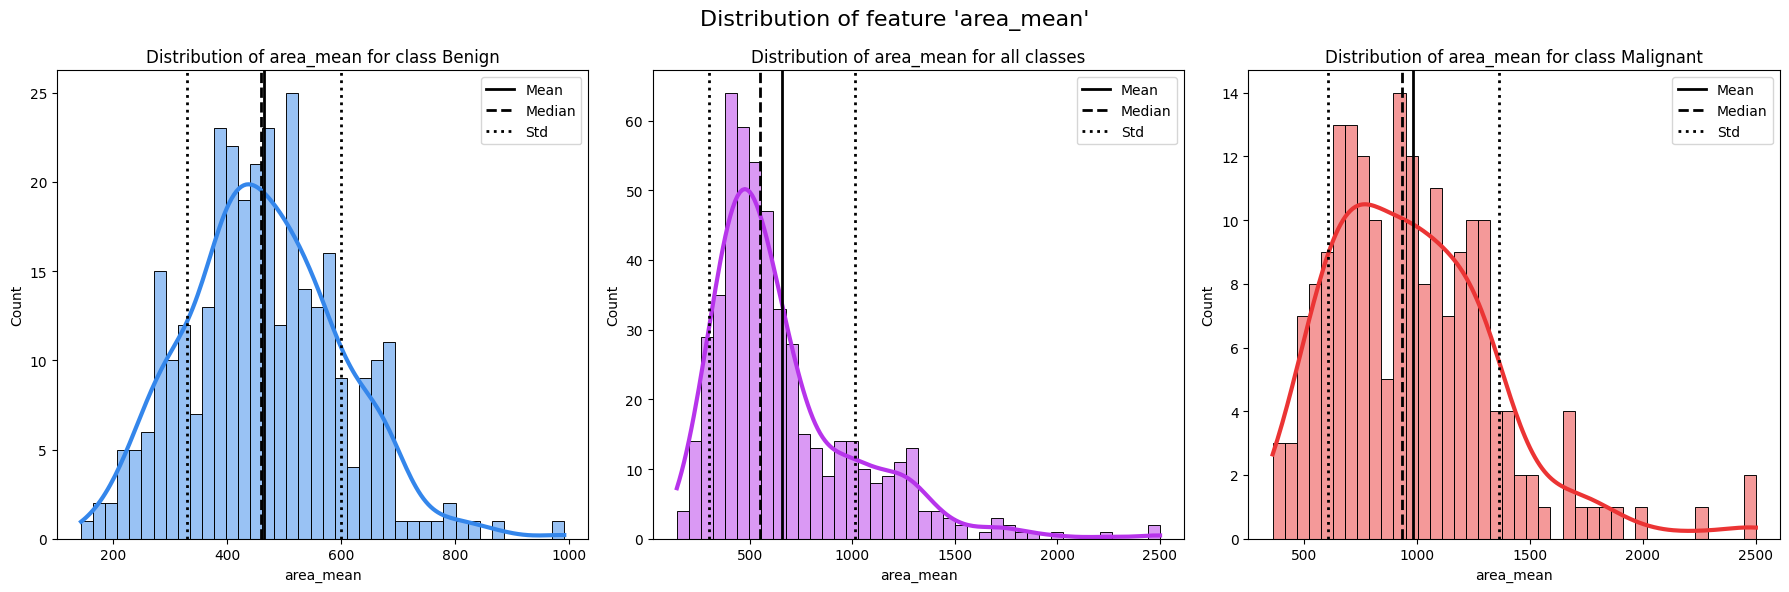

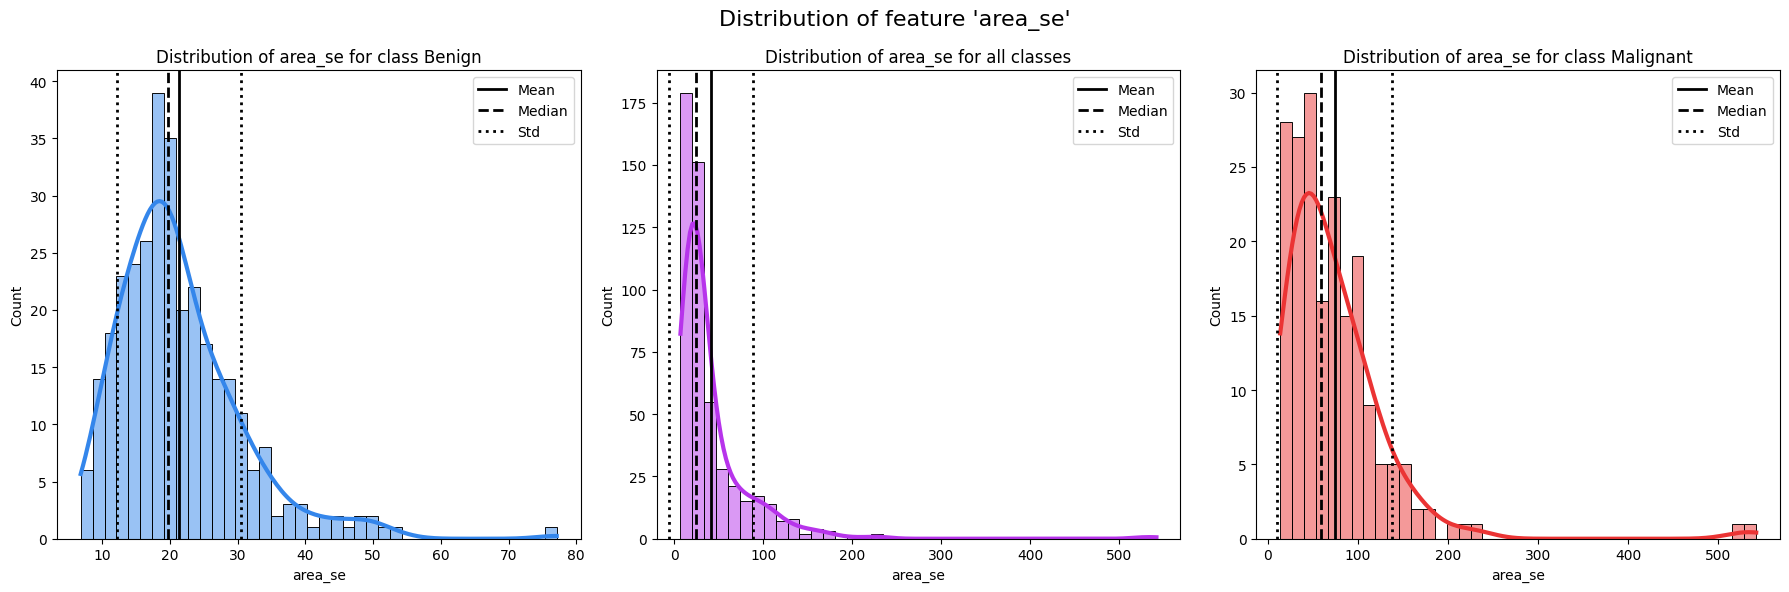

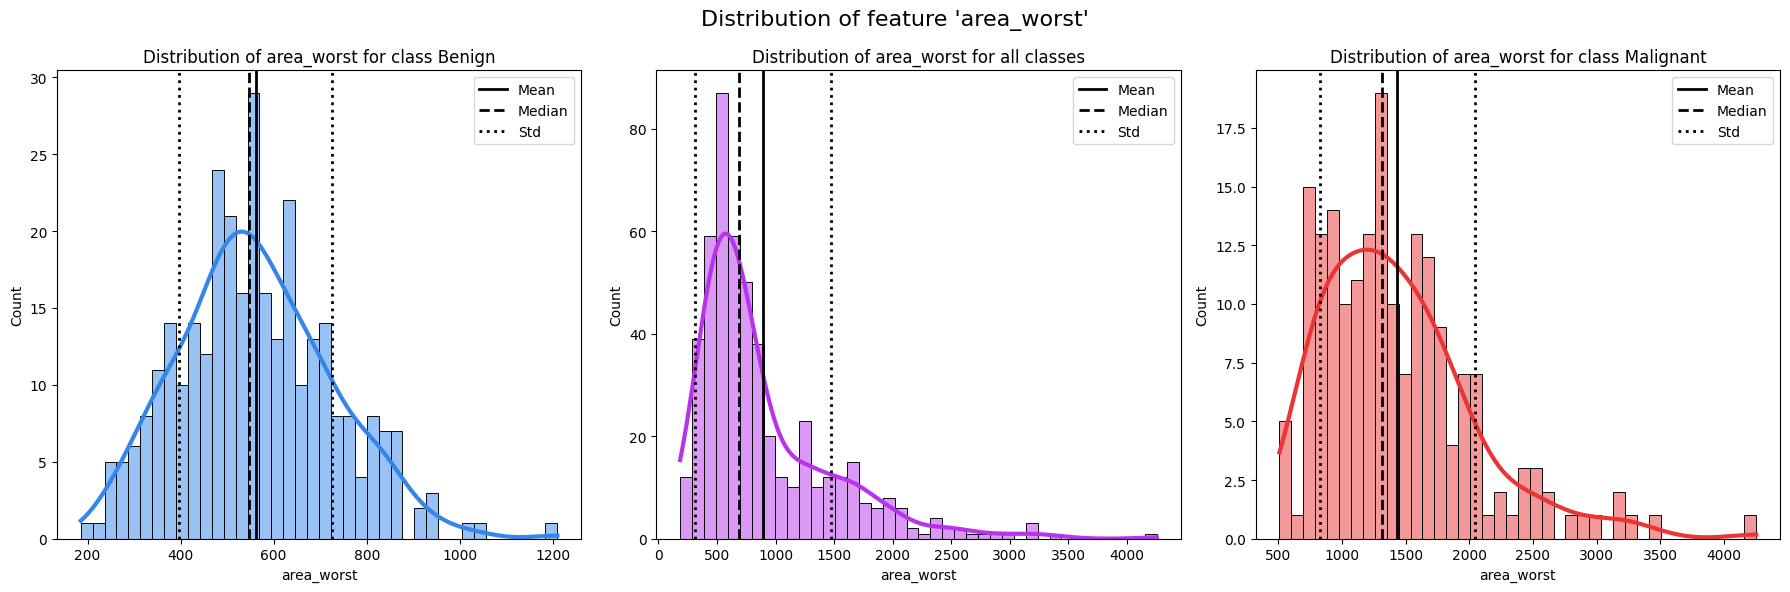

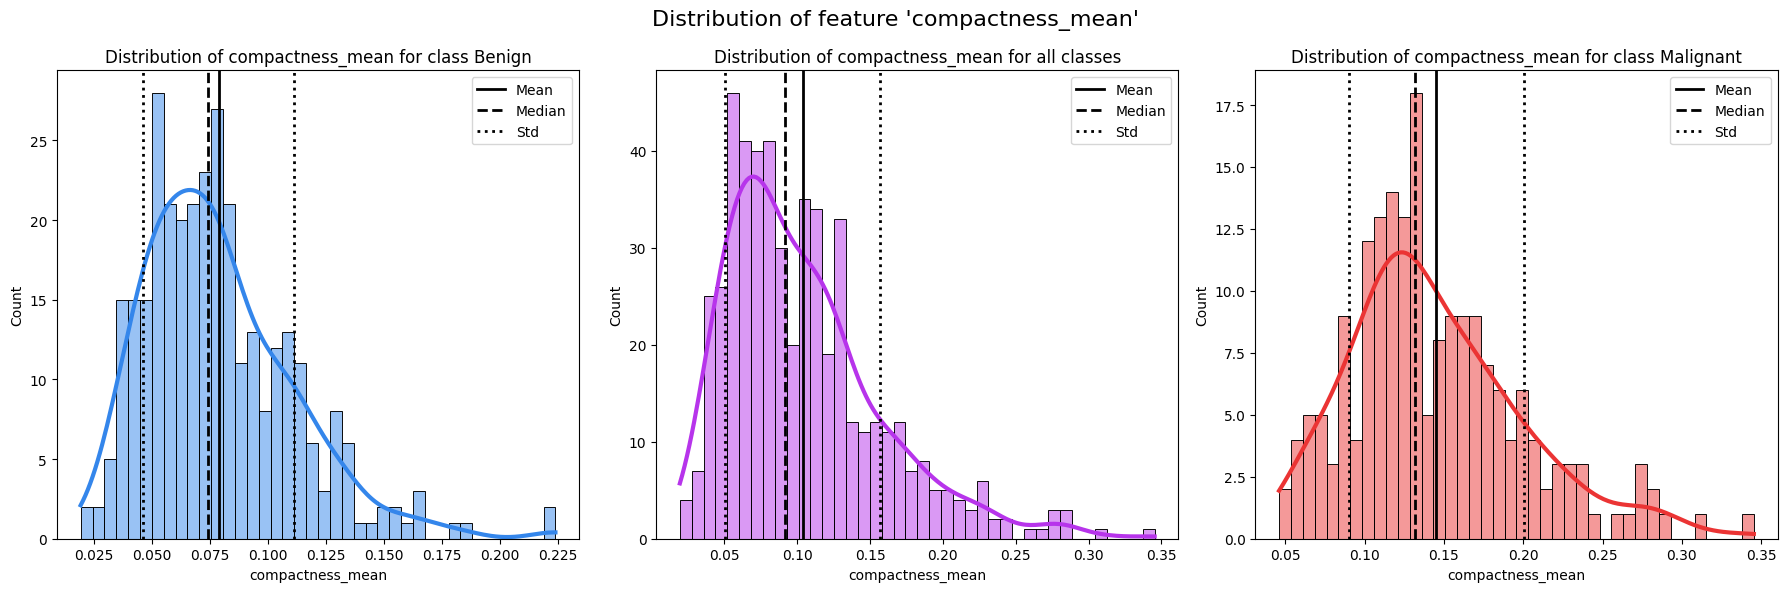

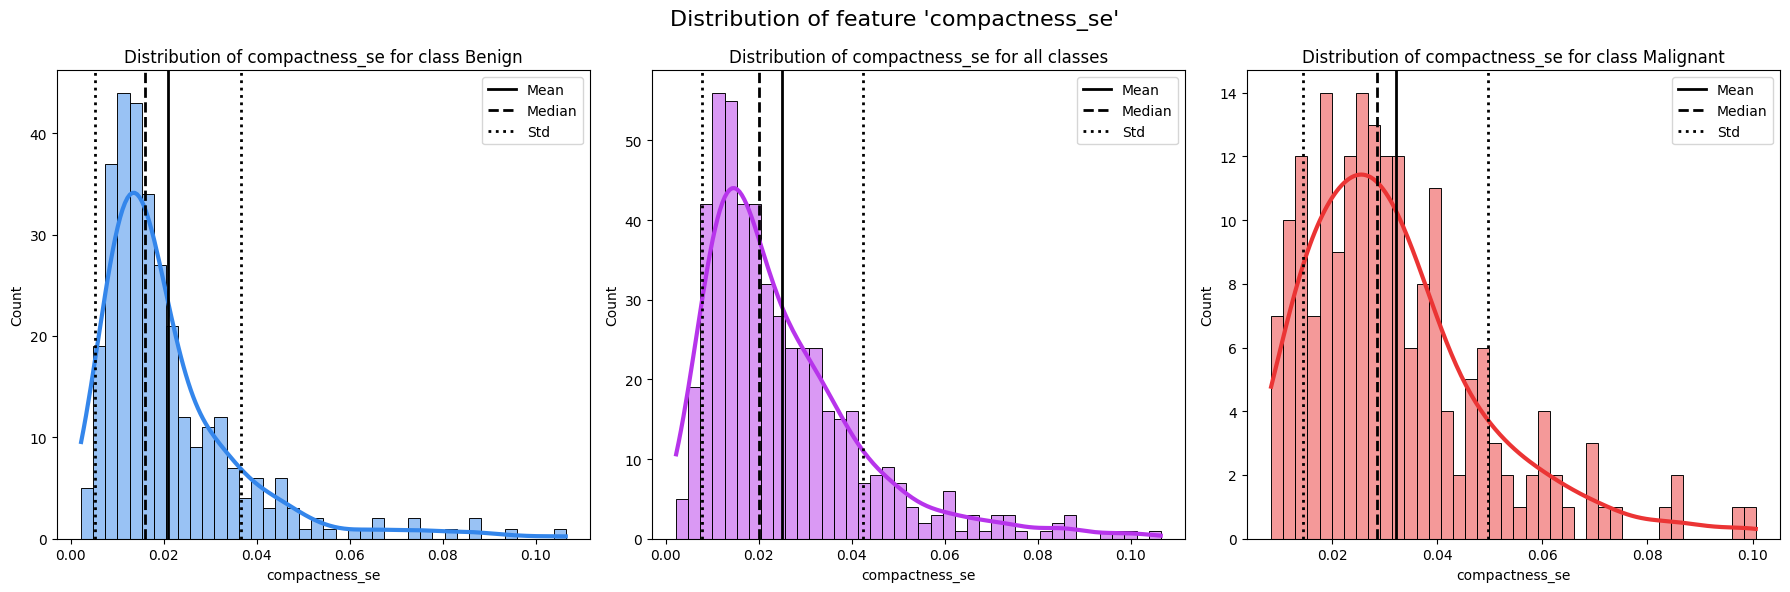

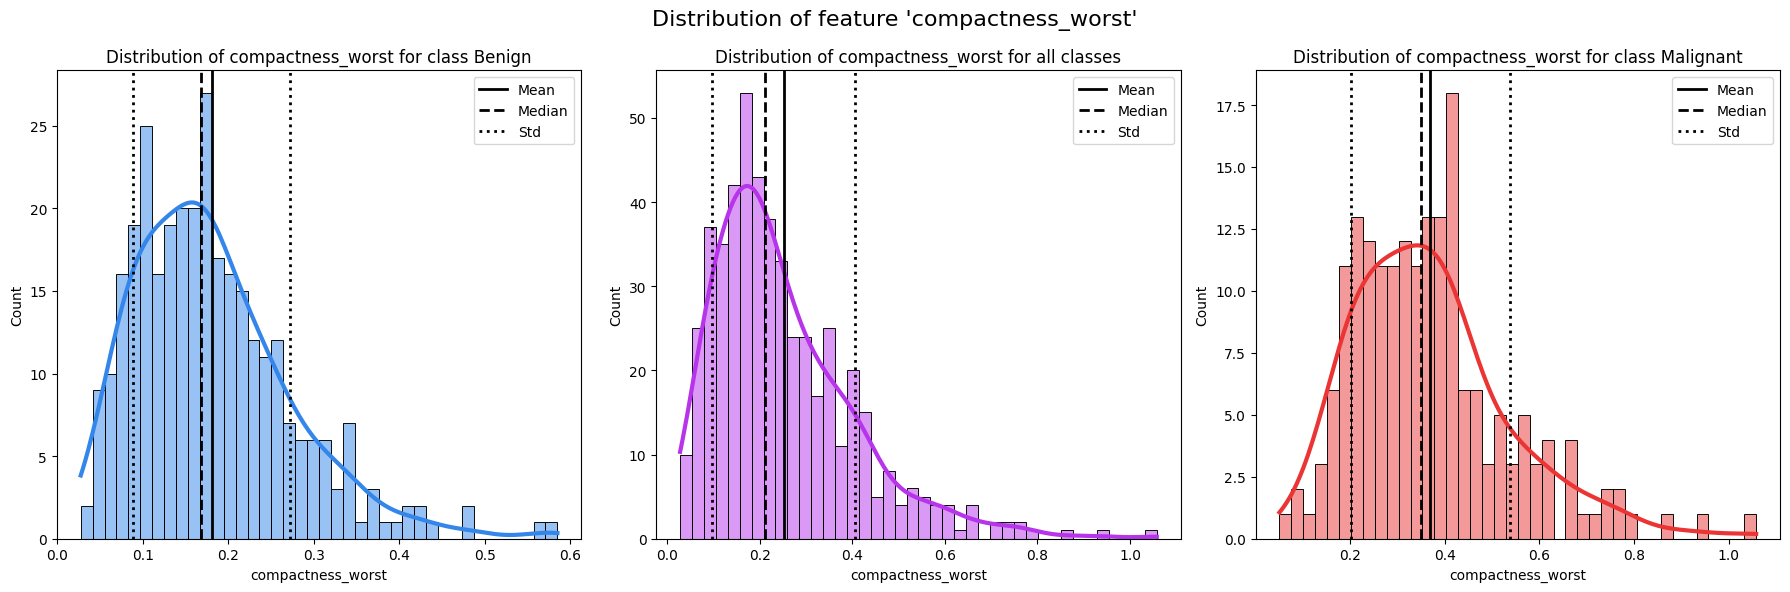

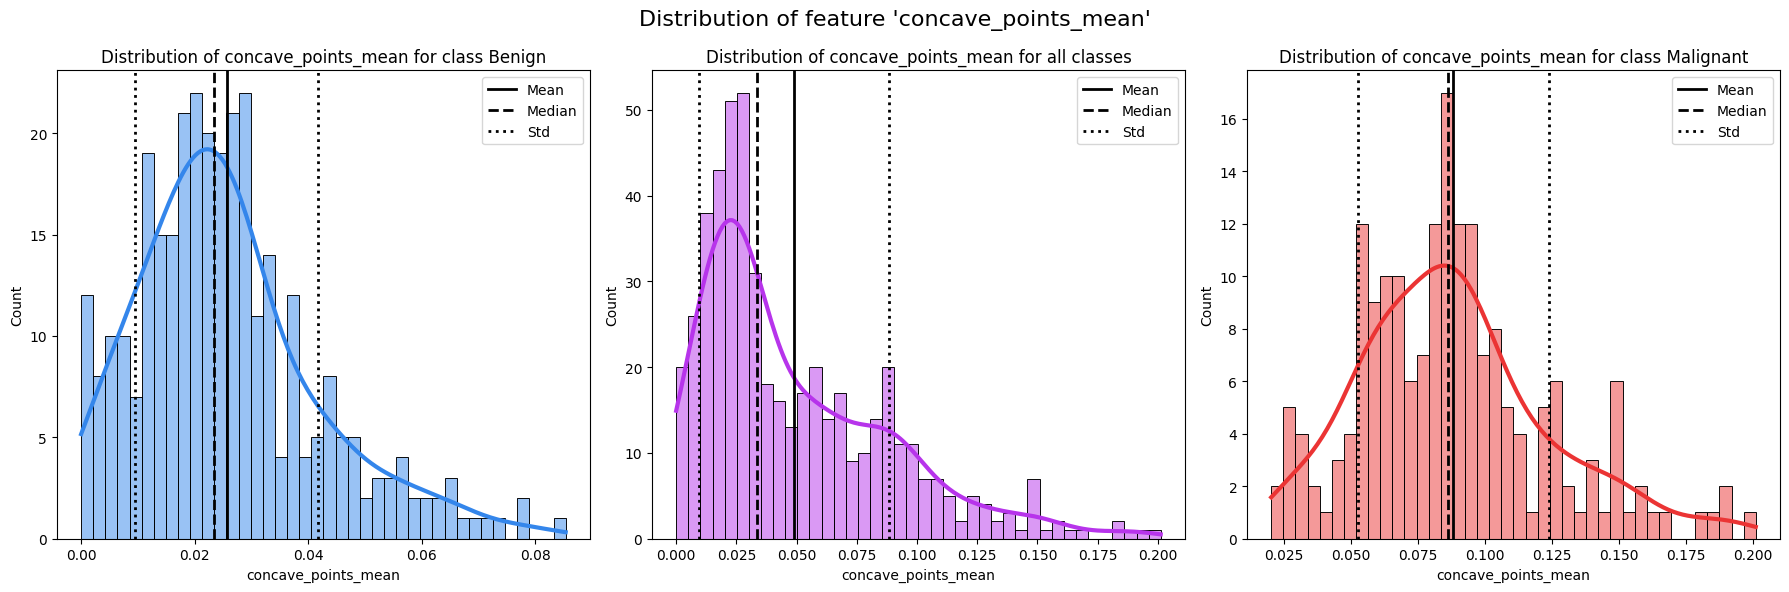

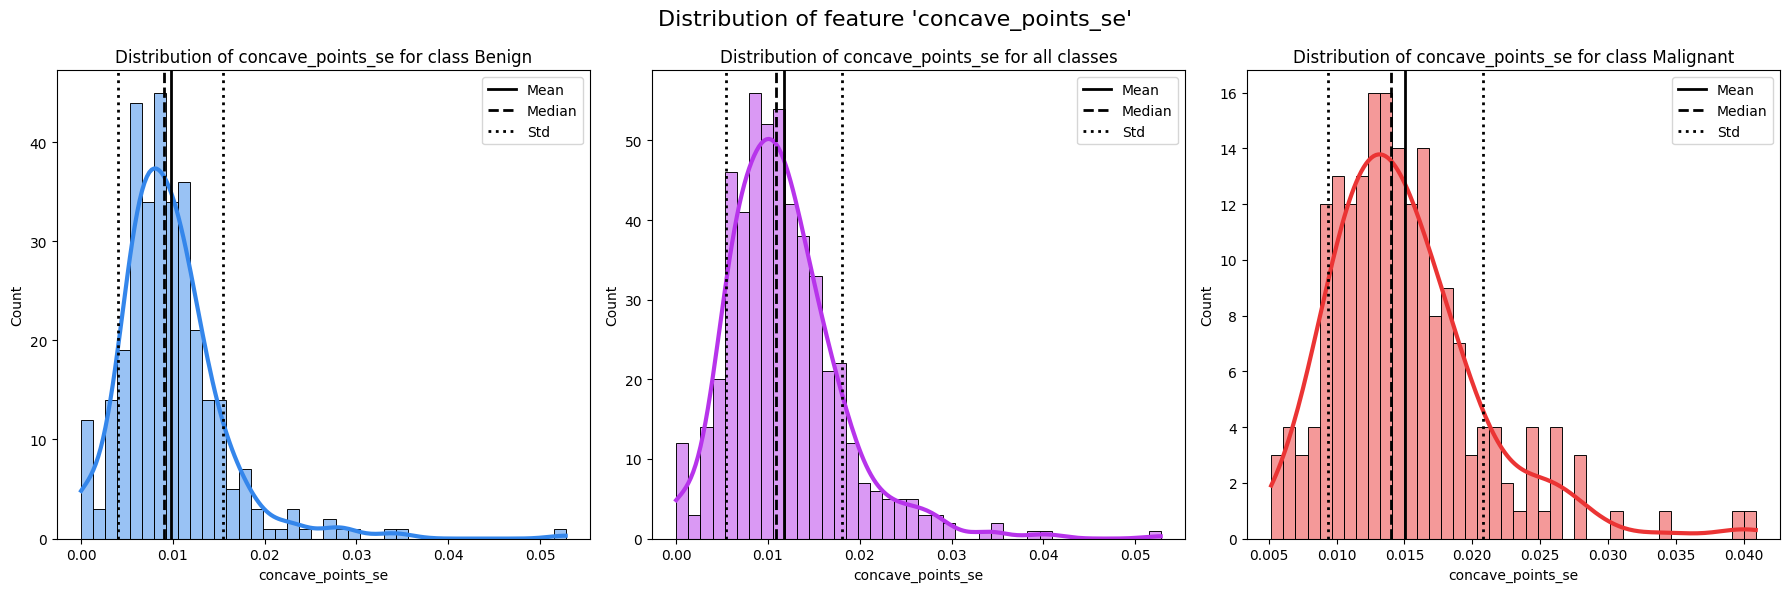

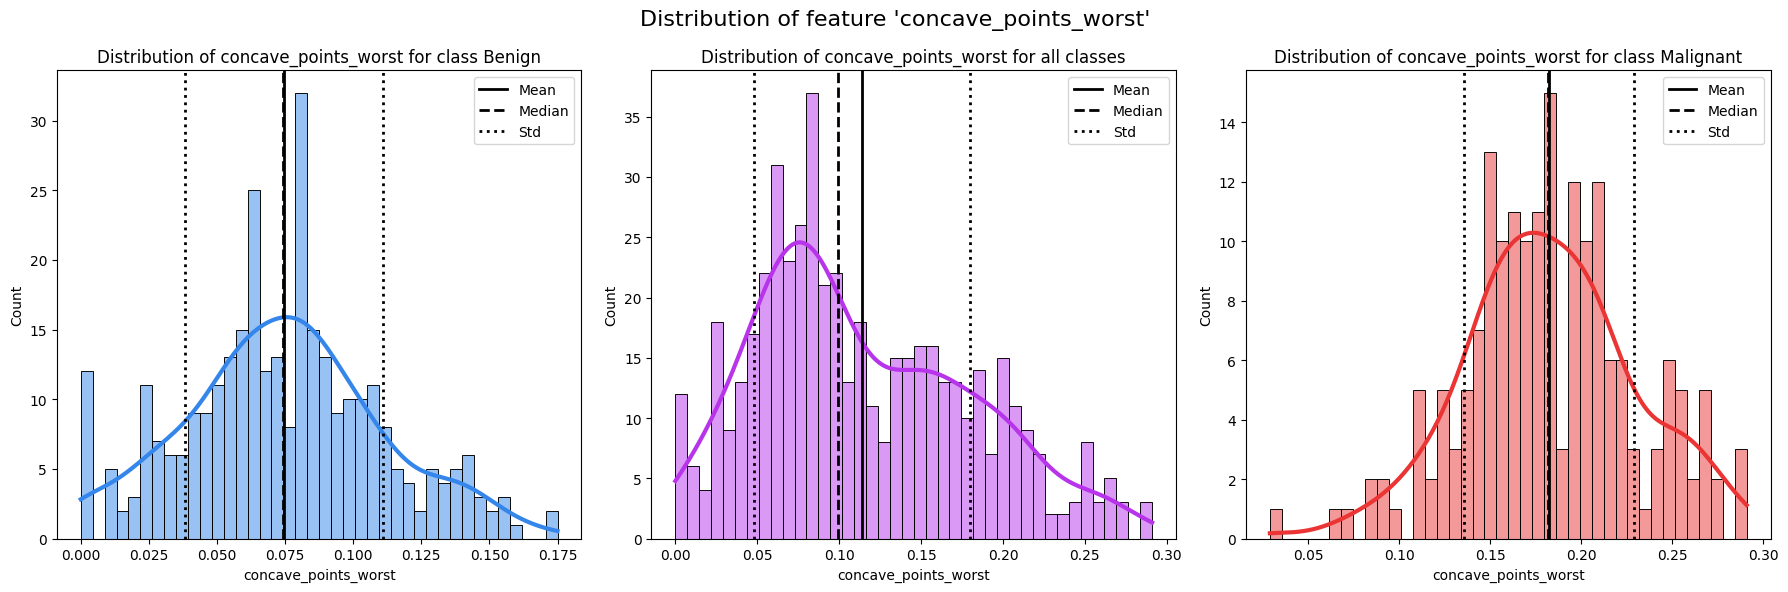

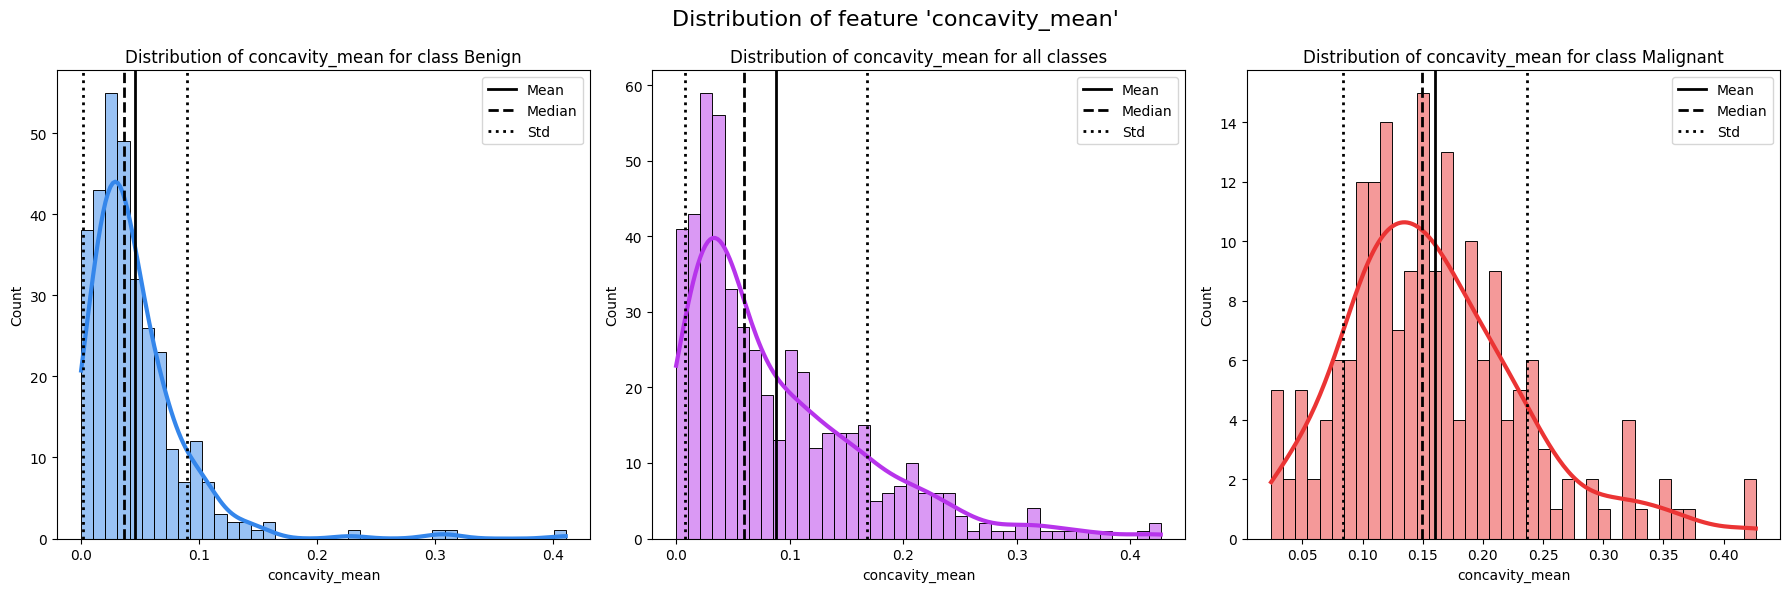

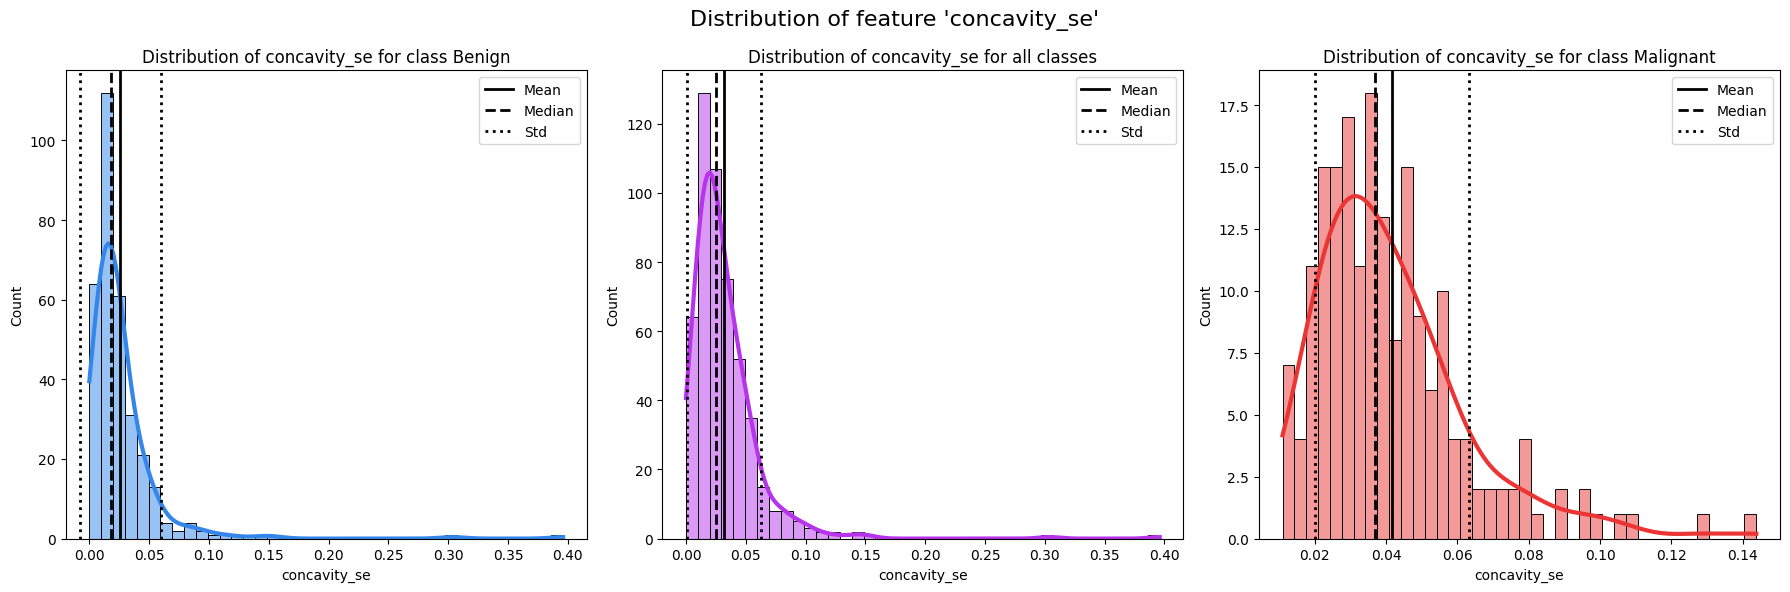

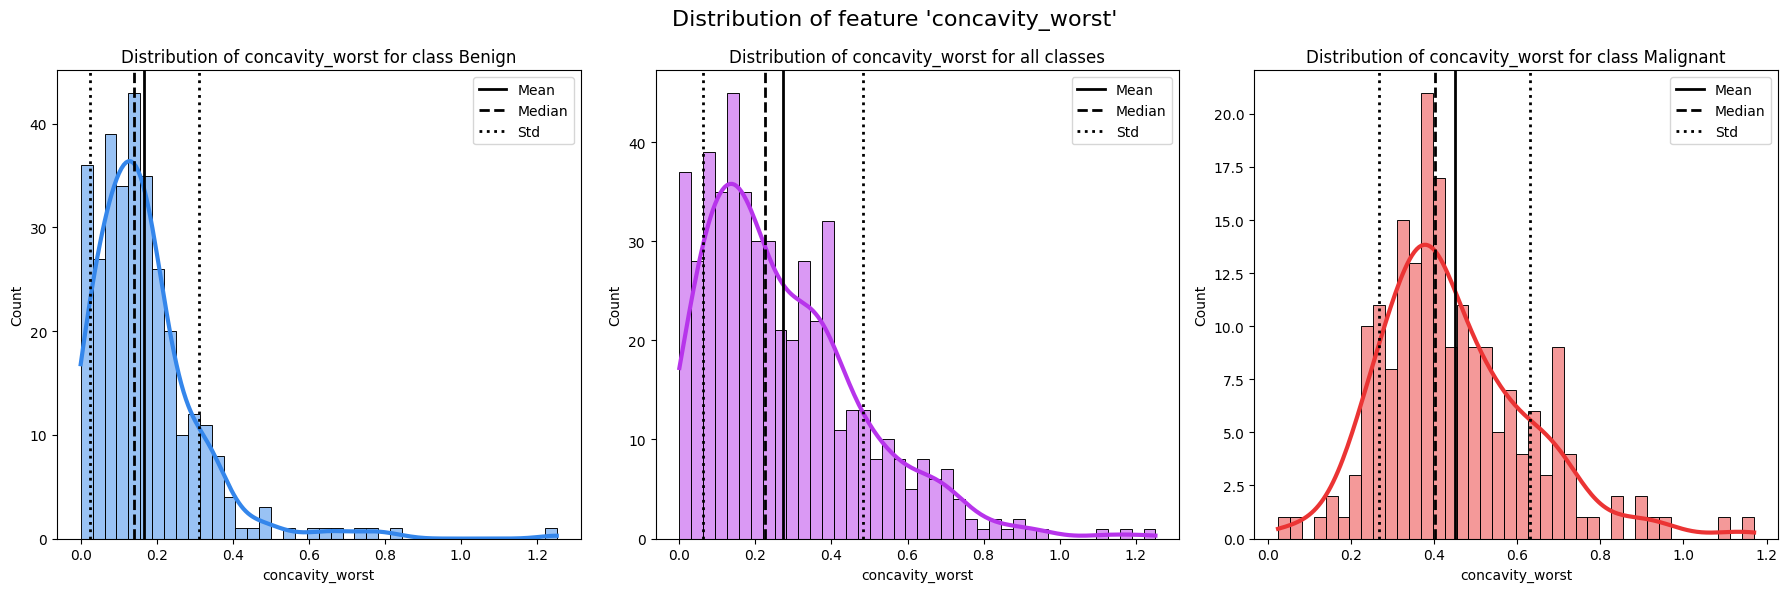

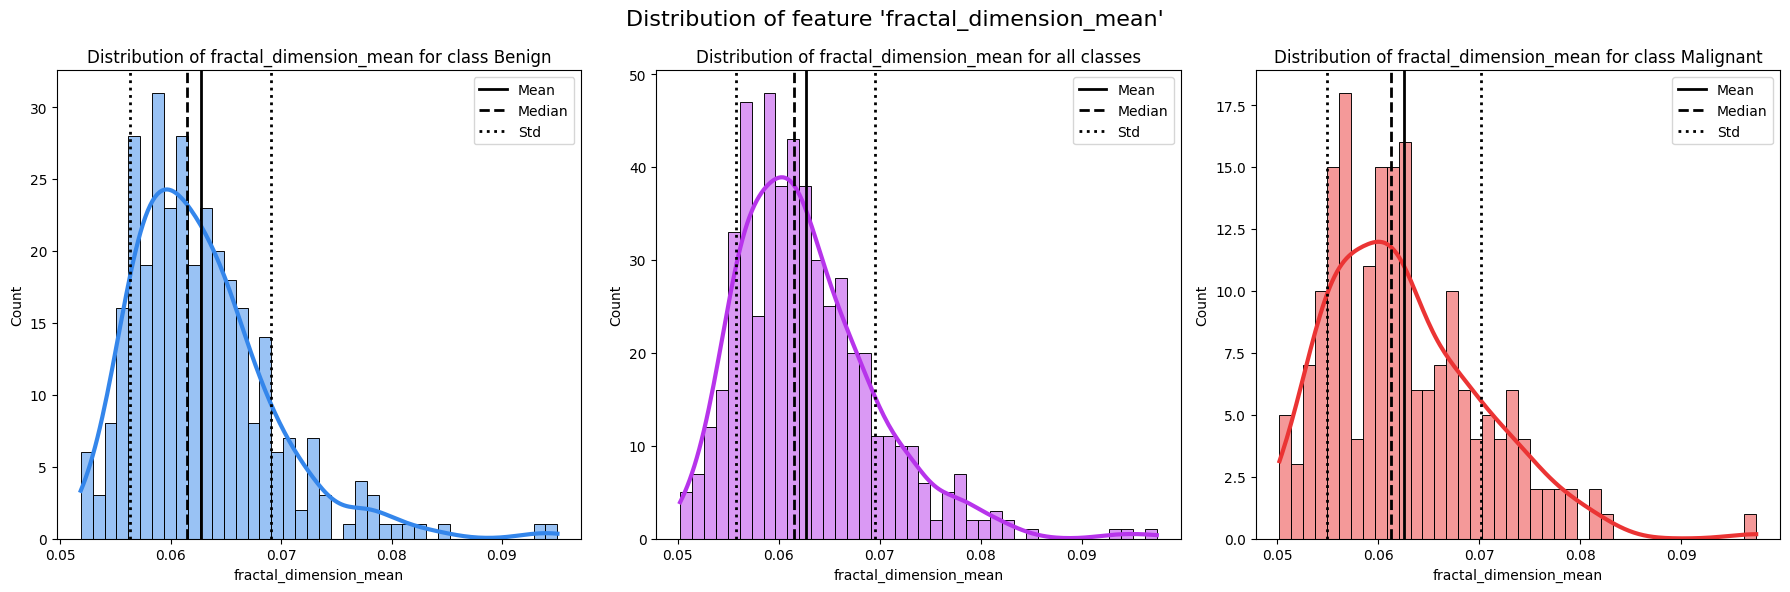

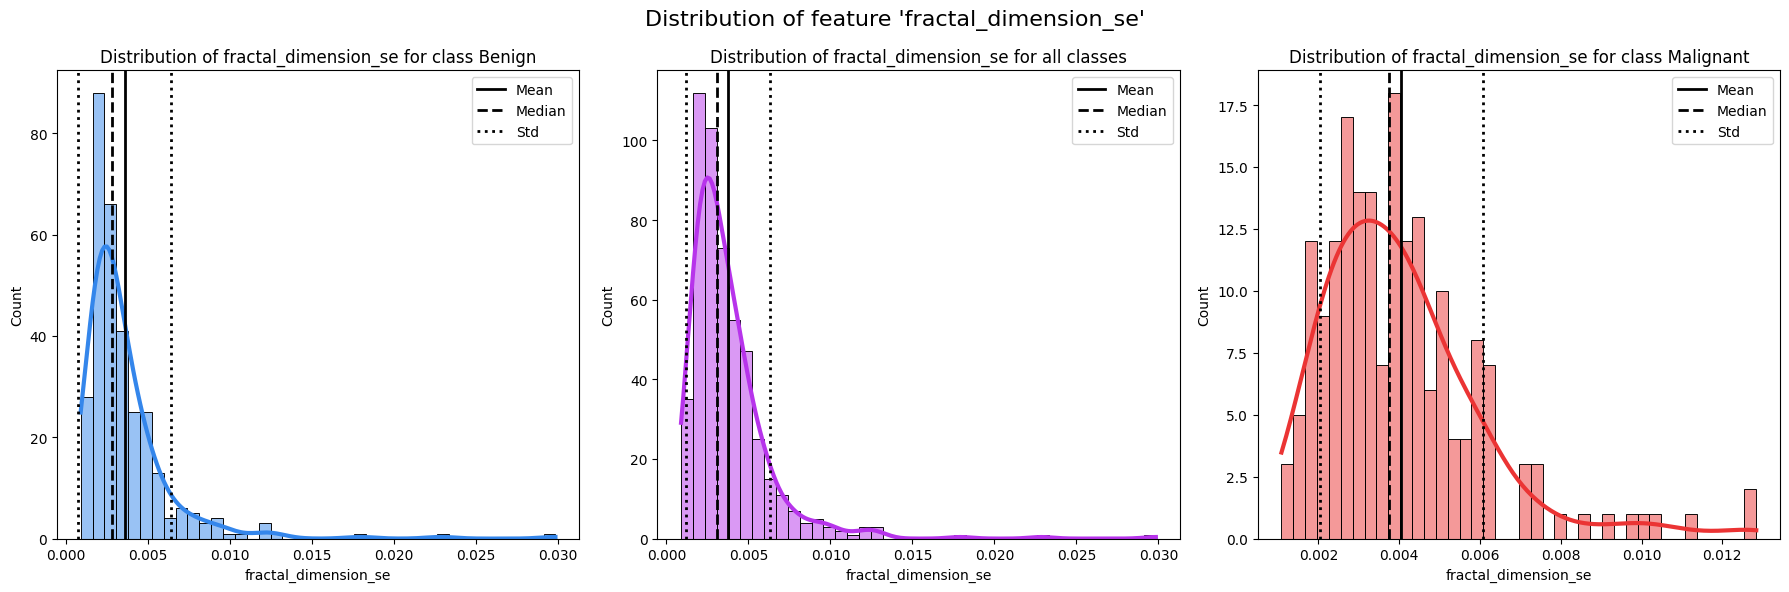

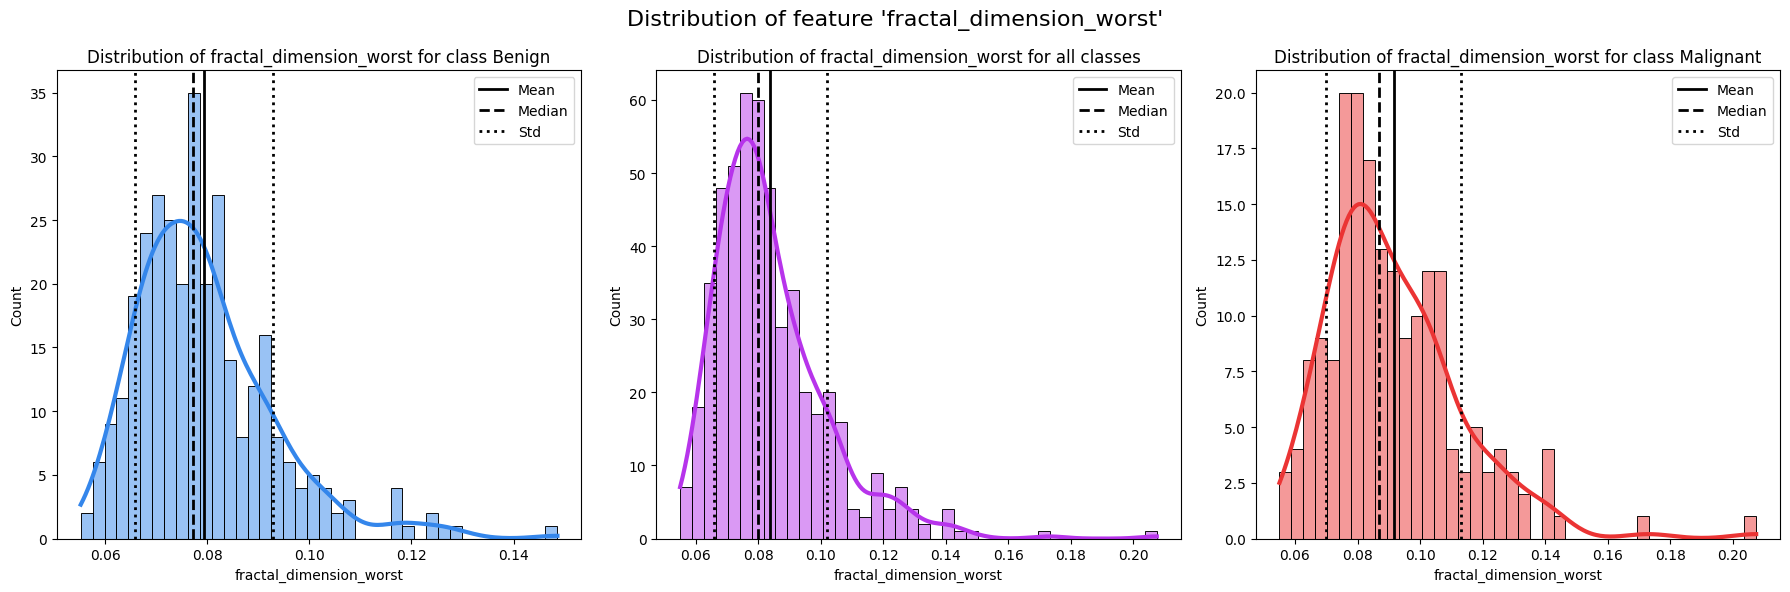

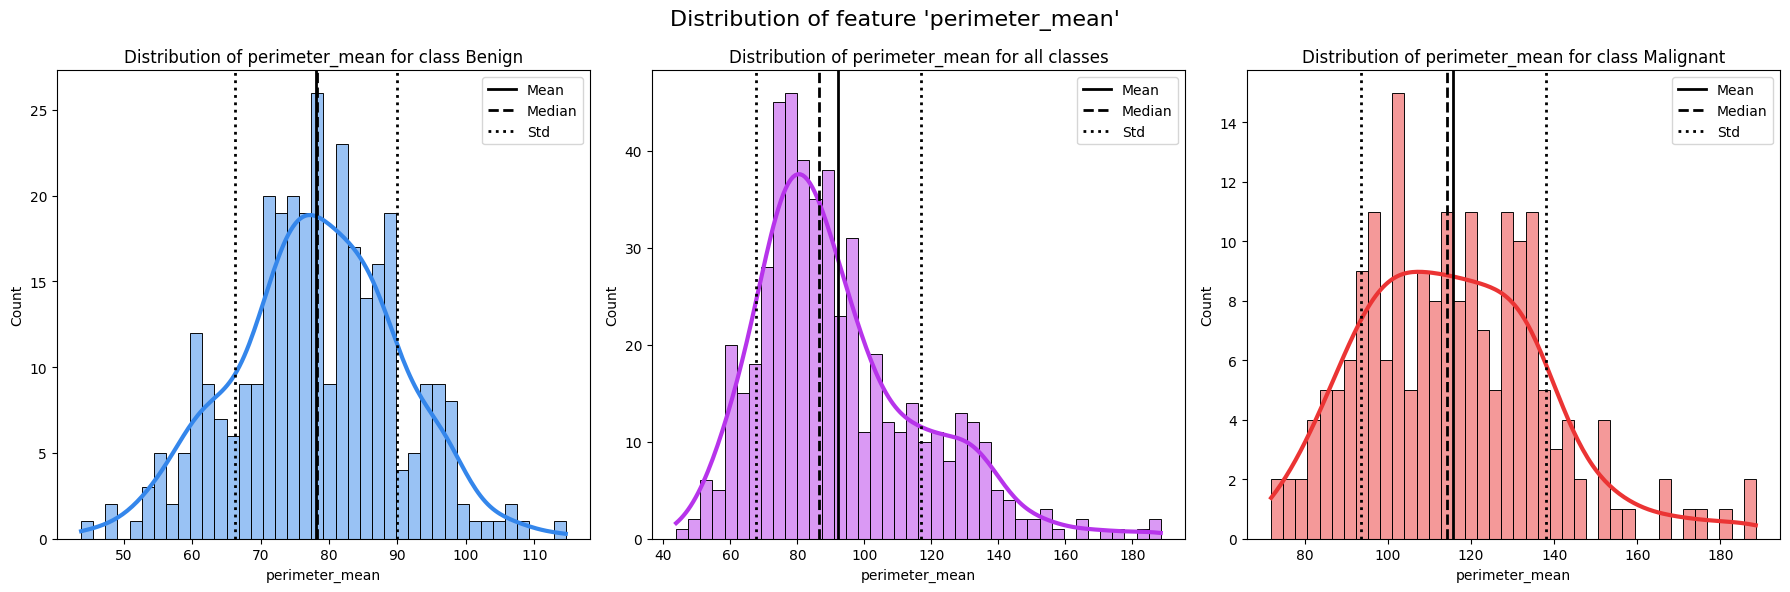

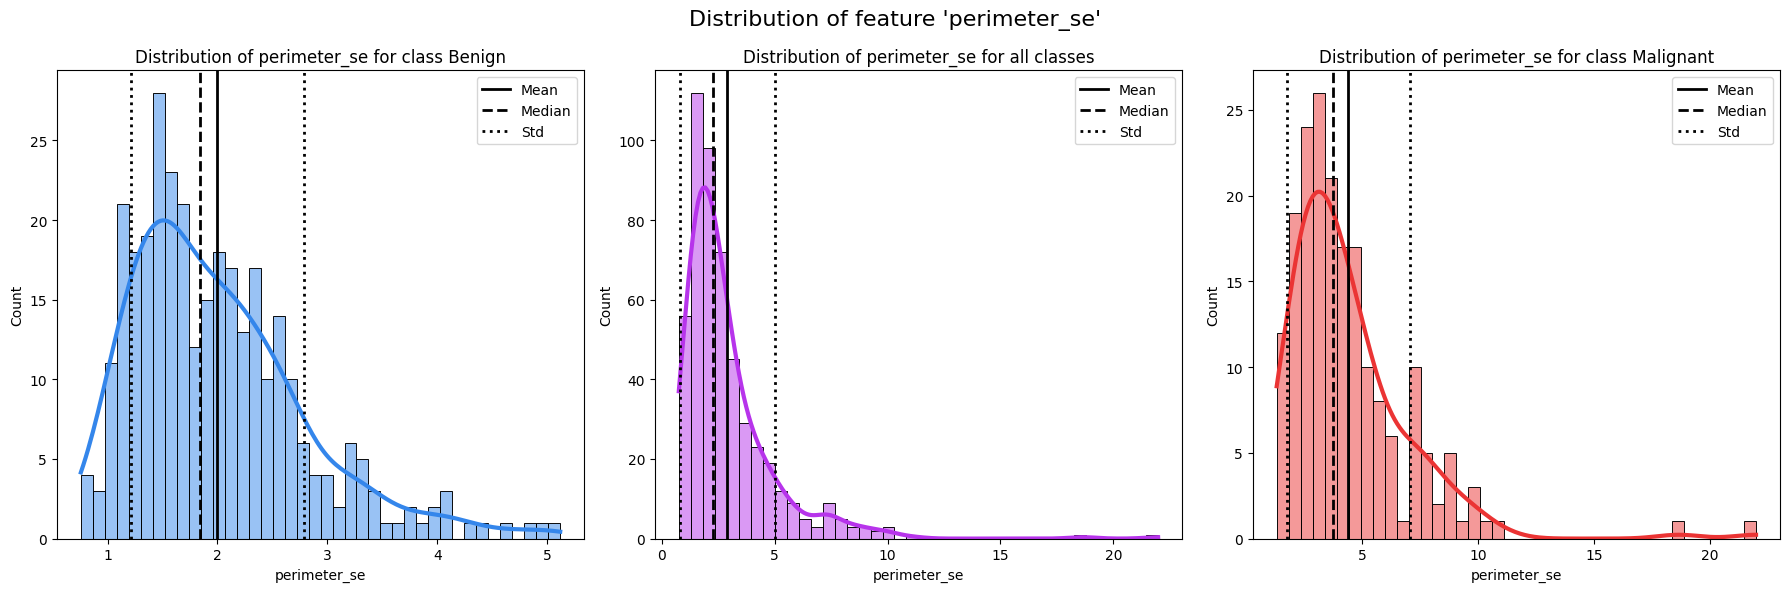

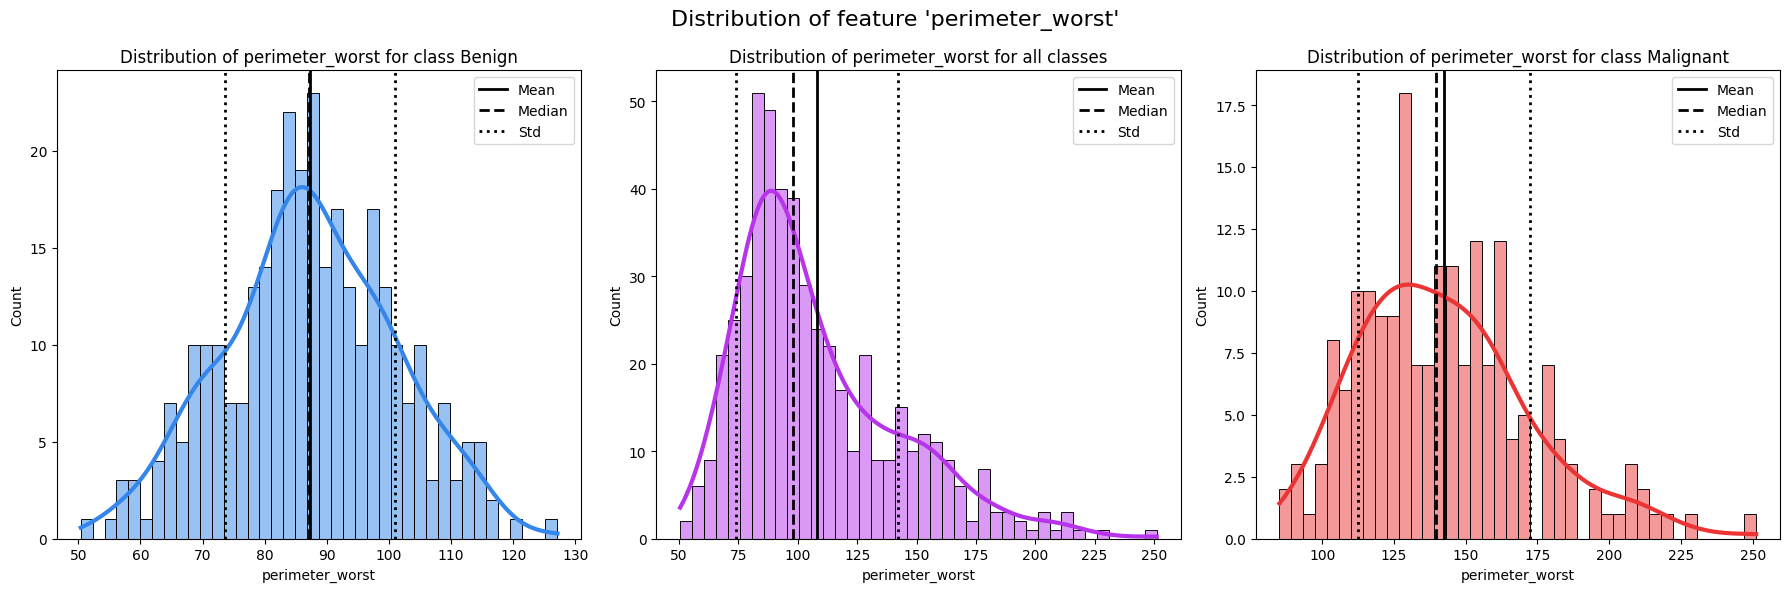

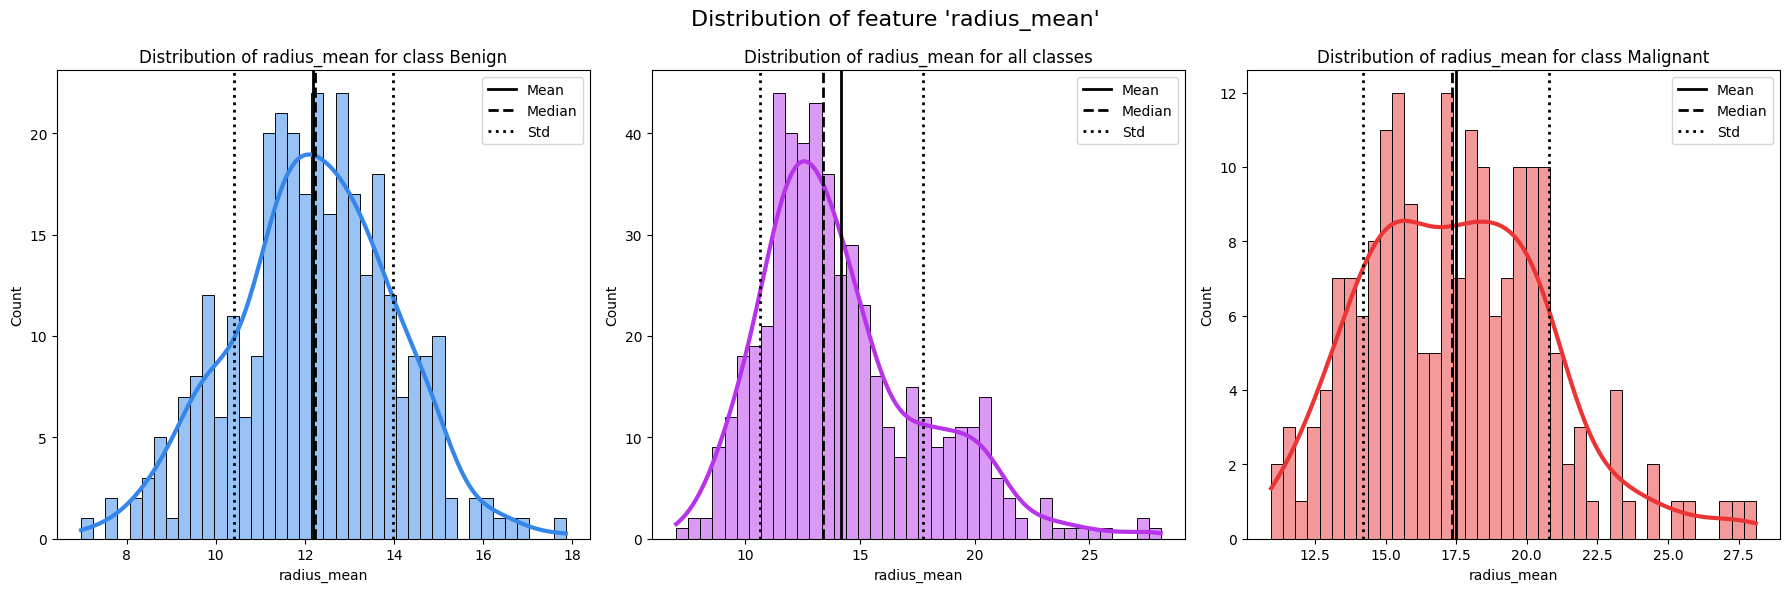

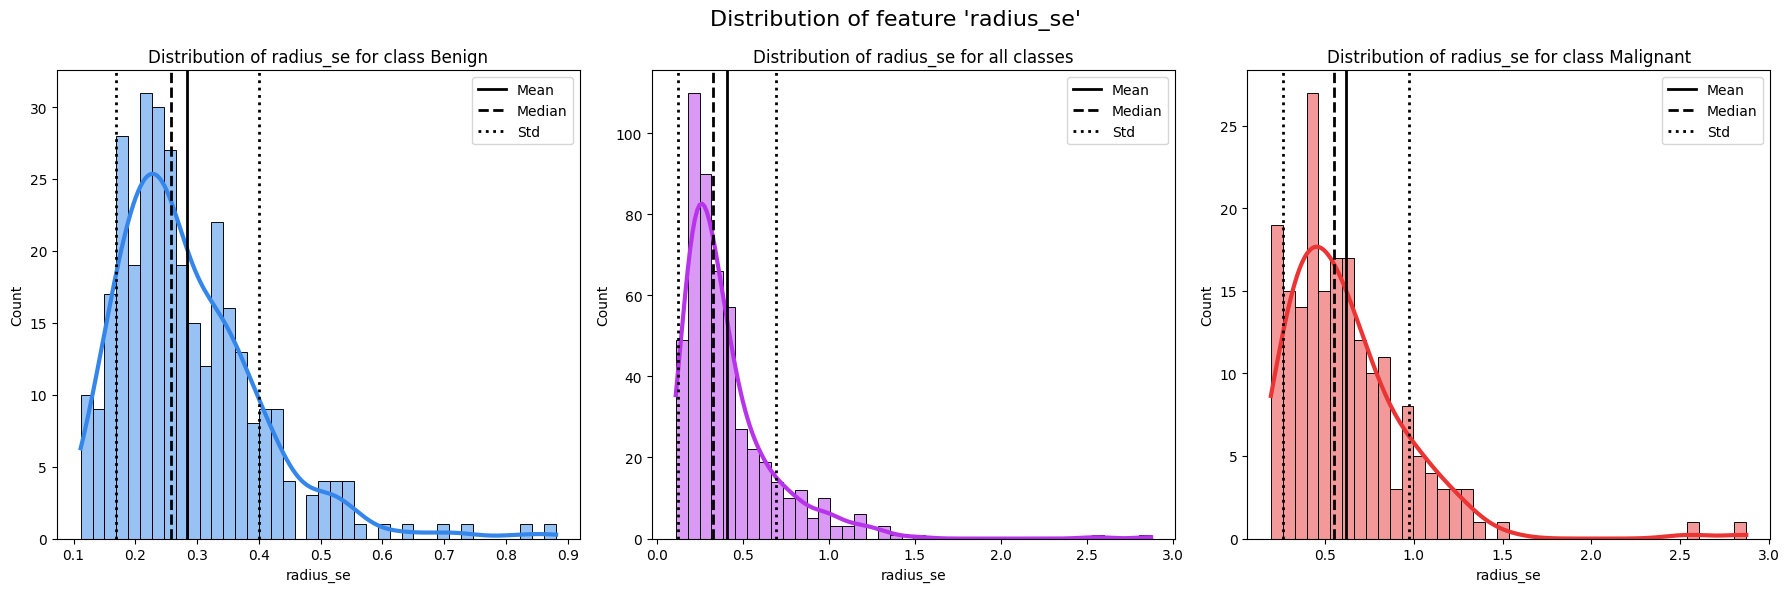

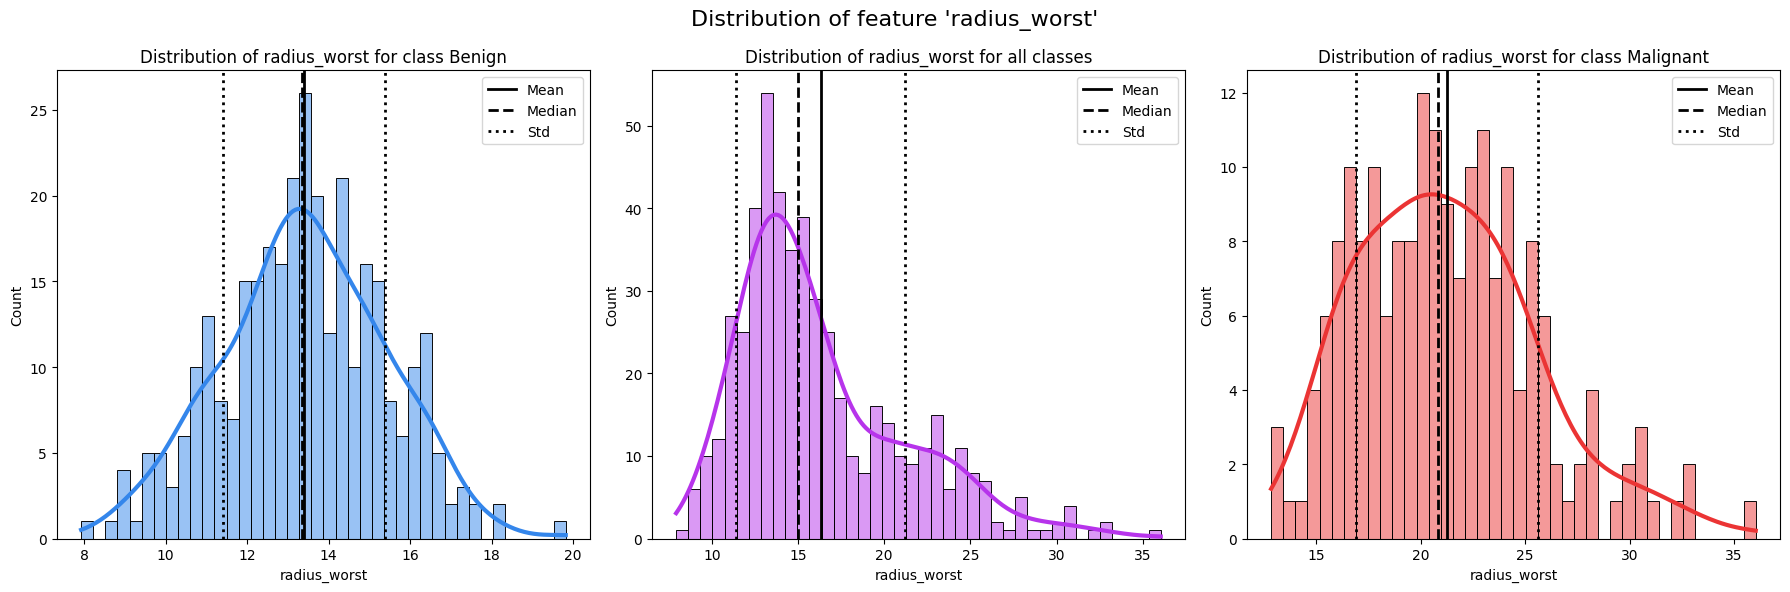

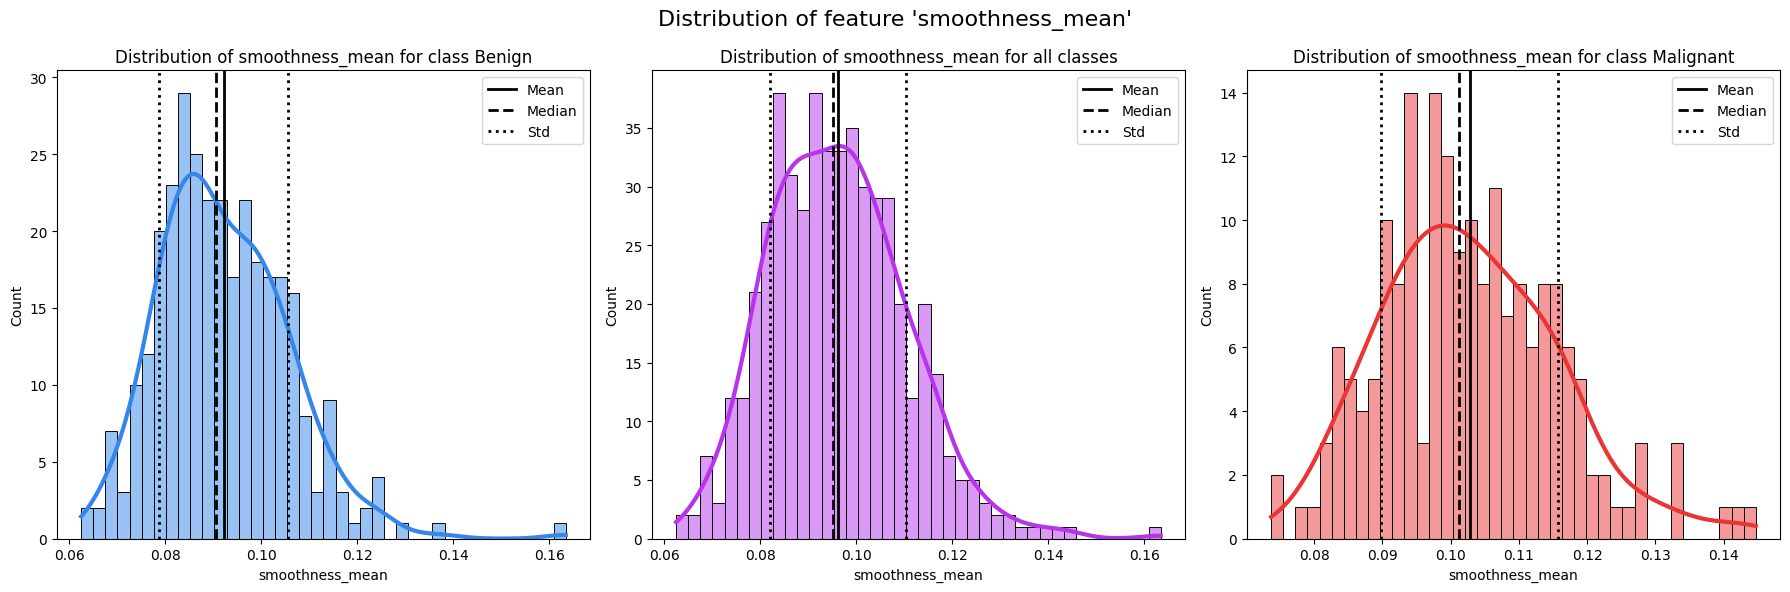

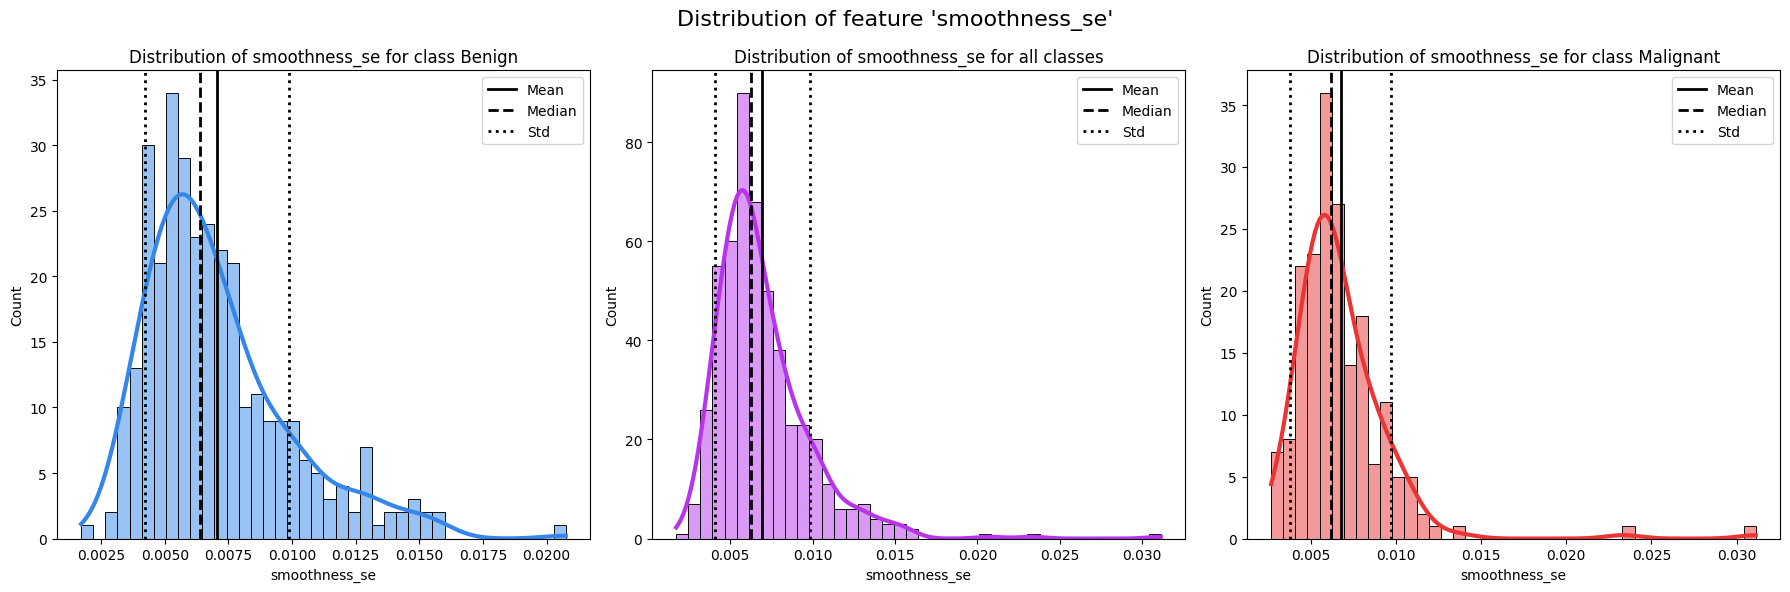

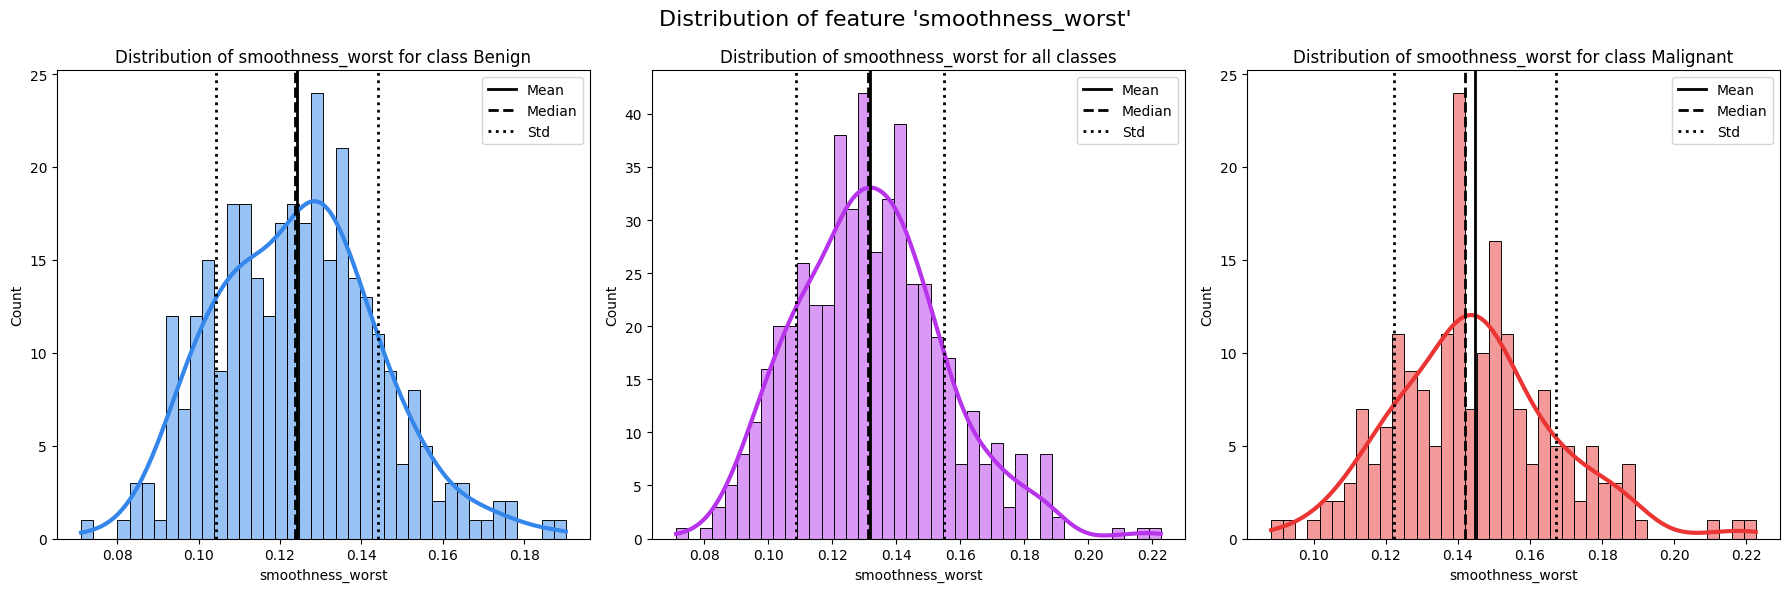

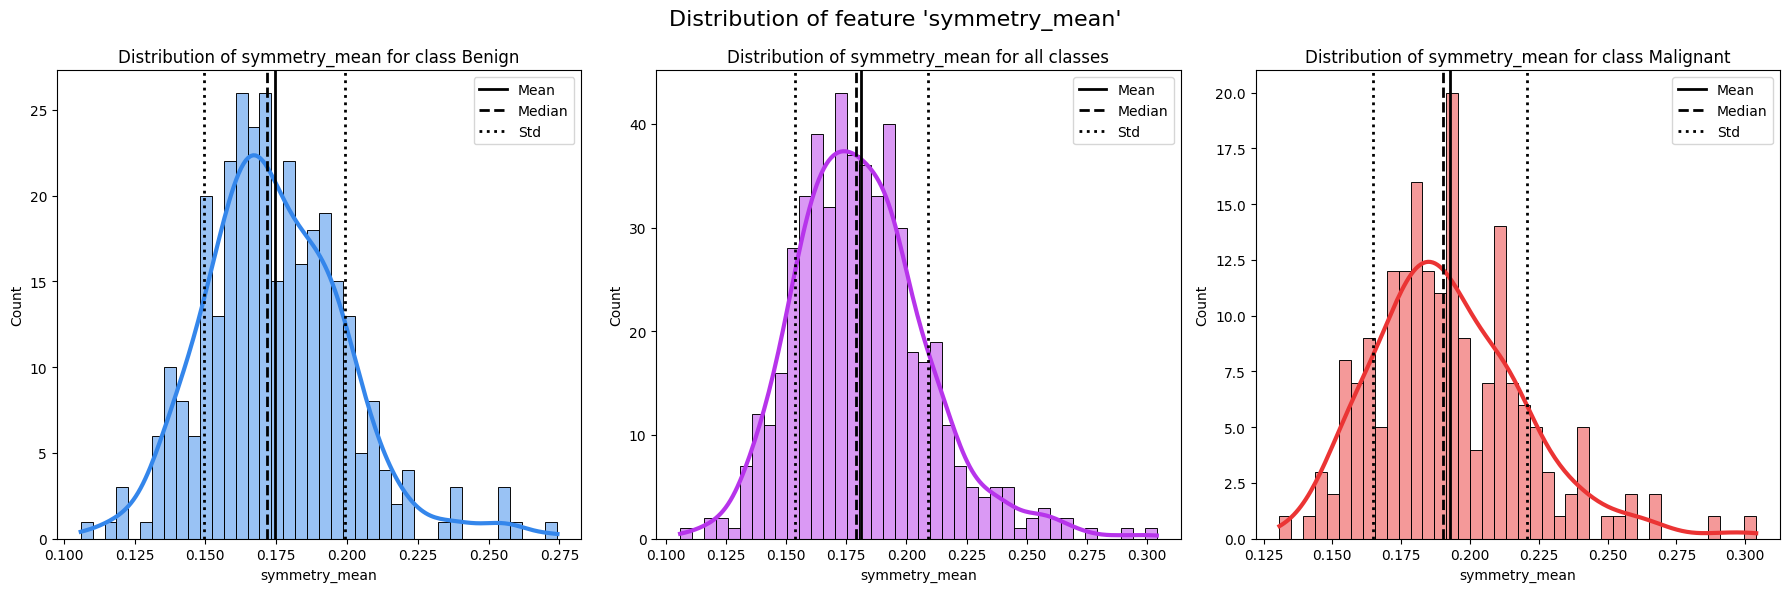

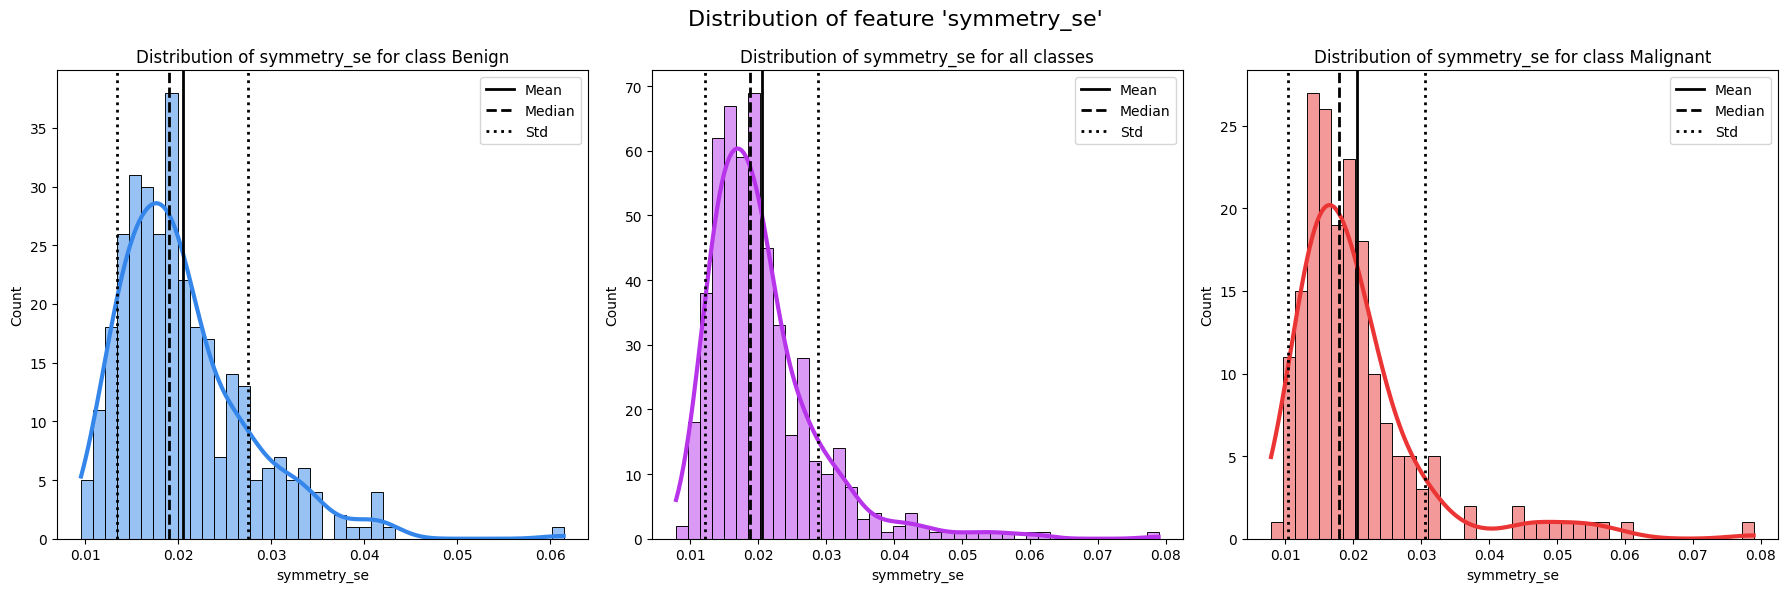

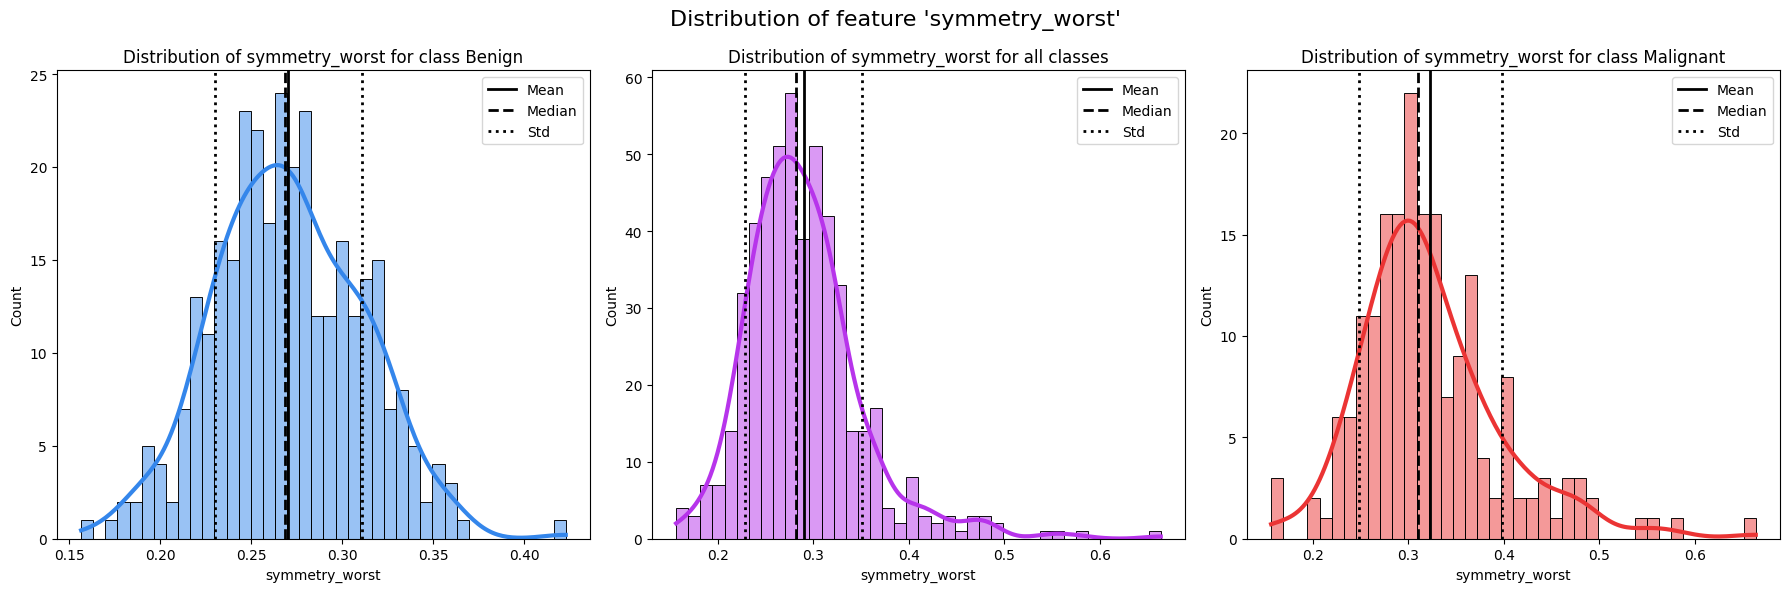

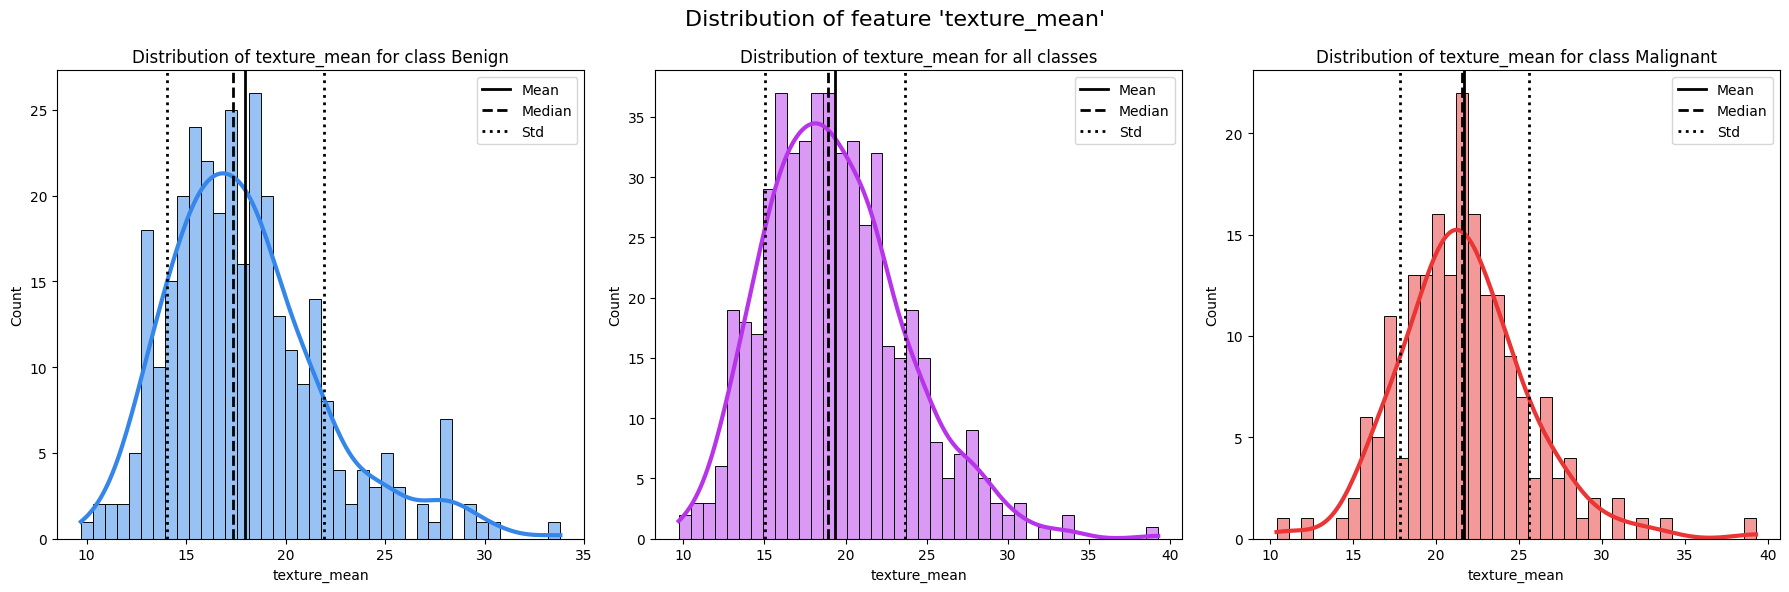

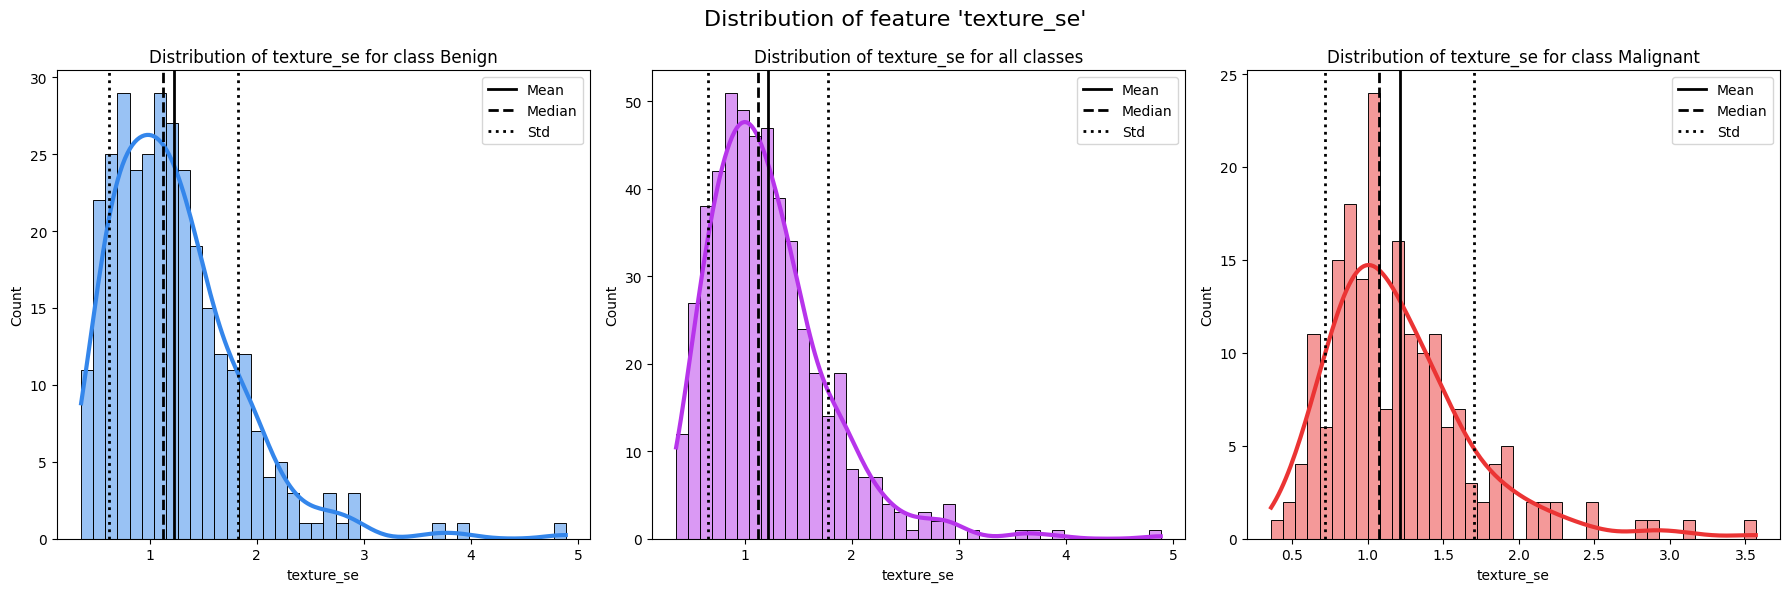

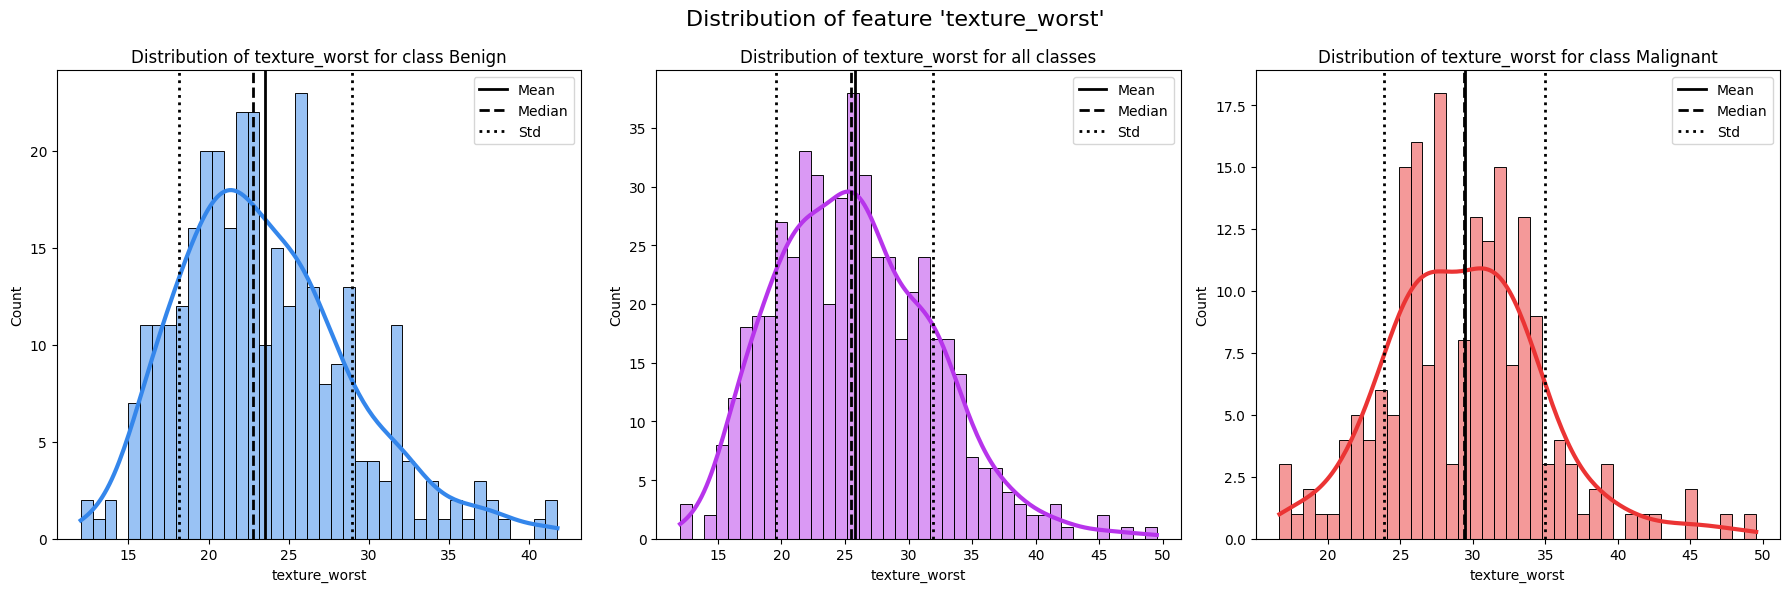

In [12]:
visualize_feature_dists(df, target.map({1: "Malignant", 0: "Benign"}))

In [13]:
df = fill_nans_with_median(df, target, class_based=True)

In [14]:
_ = check_types(df, print_summary=True)

Column <area_mean> is of type {<class 'float'>} and does not have NaN values
Column <area_se> is of type {<class 'float'>} and does not have NaN values
Column <area_worst> is of type {<class 'float'>} and does not have NaN values
Column <compactness_mean> is of type {<class 'float'>} and does not have NaN values
Column <compactness_se> is of type {<class 'float'>} and does not have NaN values
Column <compactness_worst> is of type {<class 'float'>} and does not have NaN values
Column <concave_points_mean> is of type {<class 'float'>} and does not have NaN values
Column <concave_points_se> is of type {<class 'float'>} and does not have NaN values
Column <concave_points_worst> is of type {<class 'float'>} and does not have NaN values
Column <concavity_mean> is of type {<class 'float'>} and does not have NaN values
Column <concavity_se> is of type {<class 'float'>} and does not have NaN values
Column <concavity_worst> is of type {<class 'float'>} and does not have NaN values
Column <fracta

In [15]:
plot_correlation_coefficients(get_correlations(df, target))

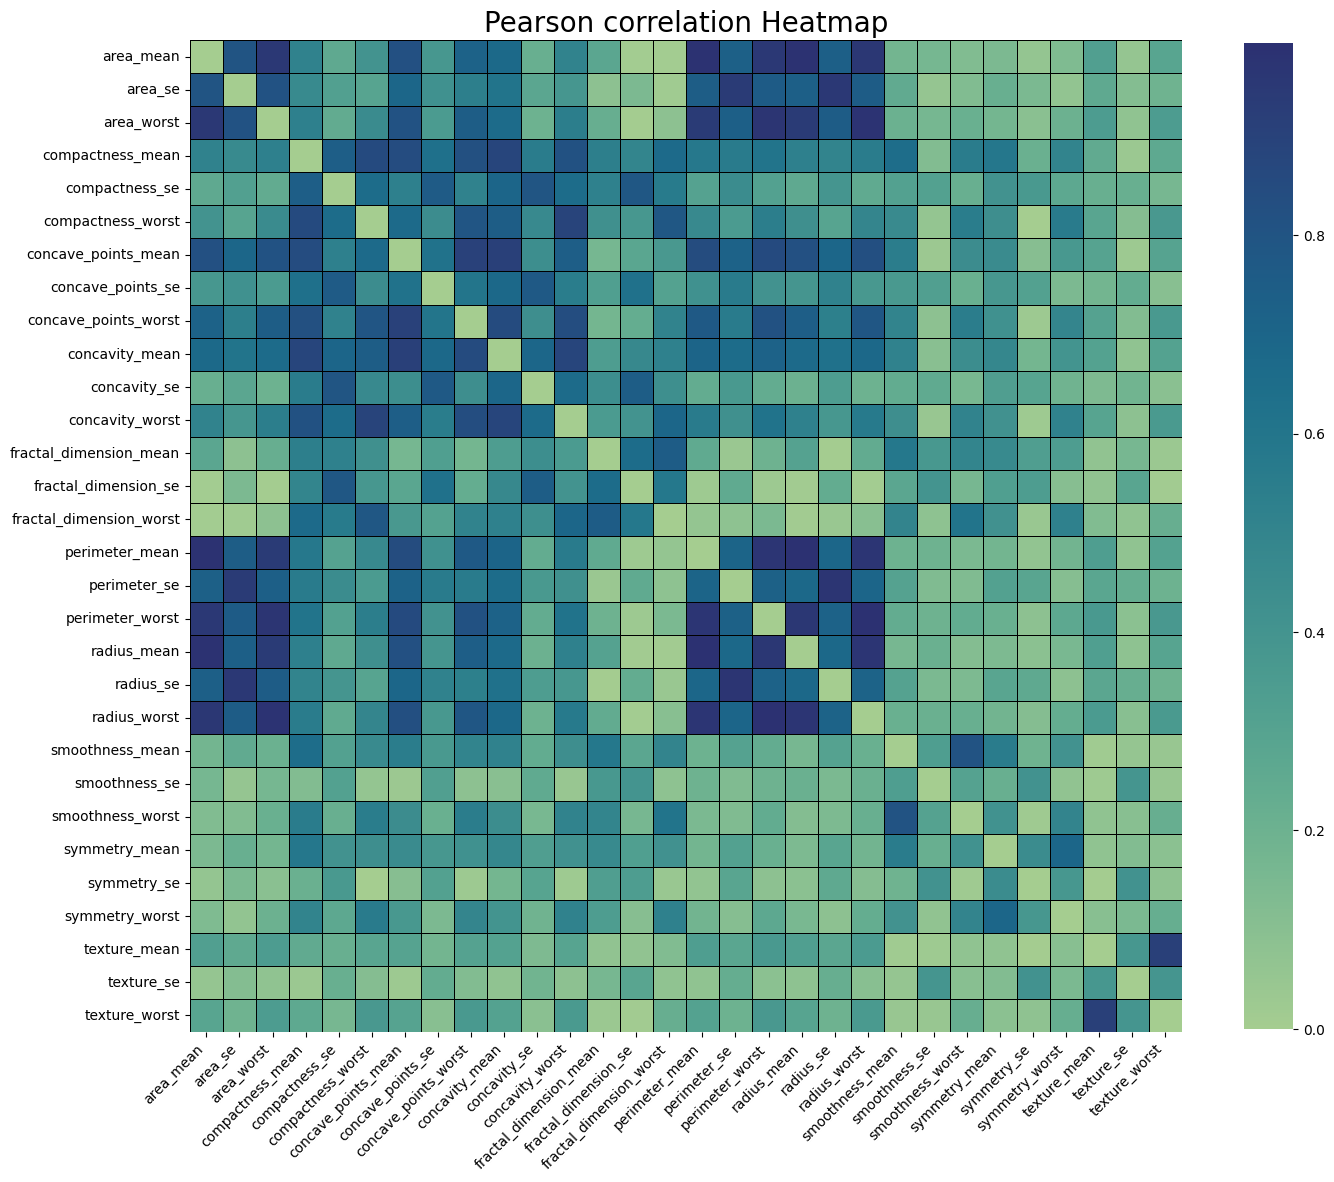

In [16]:
heatmap_correlations(get_correlations_pair_matrix(df), labels=df.columns)

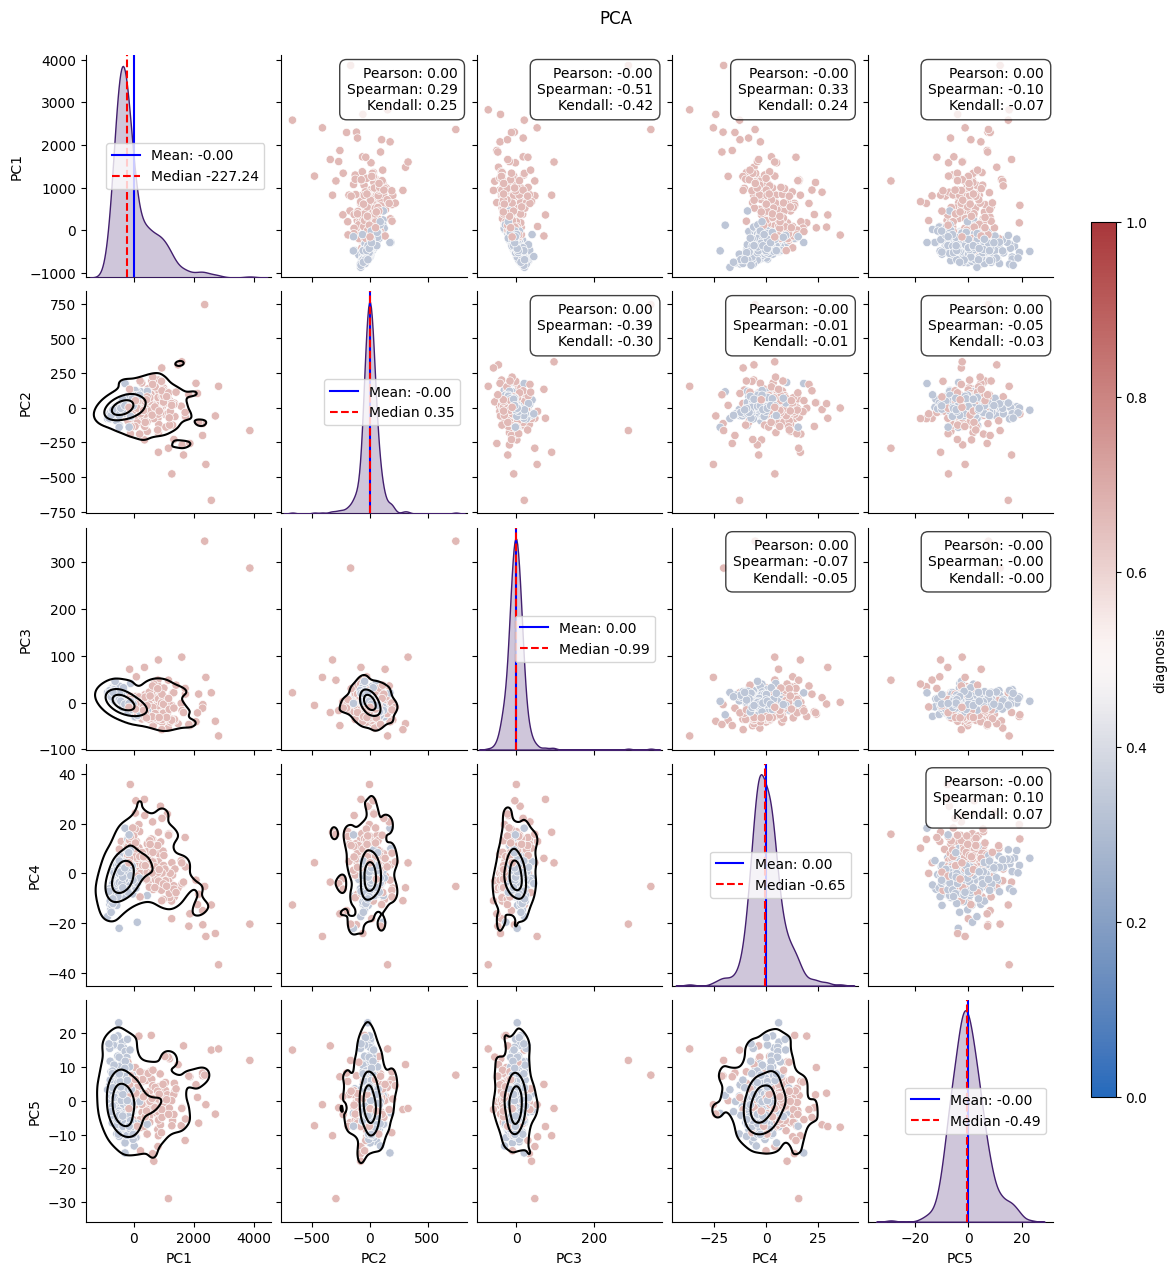

In [17]:
pairplot(
    data=dim_red(df, method="pca", percent=0.9999),
    title="PCA",
    hue=target,
    cmap="vlag"
)

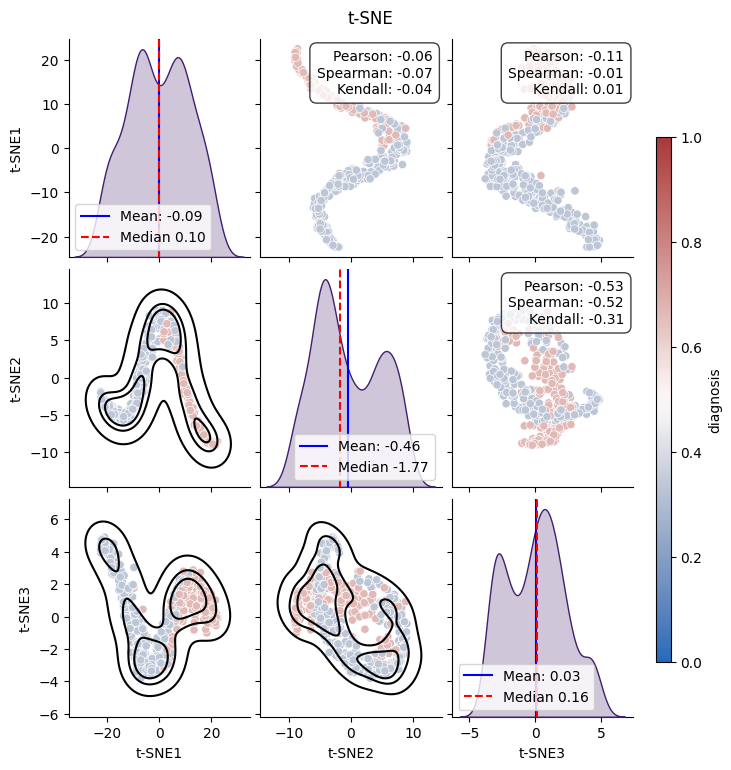

In [18]:
pairplot(
    data=dim_red(df, method="tsne", n_components=3),
    title="t-SNE",
    hue=target,
    cmap="vlag"
)

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-2/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



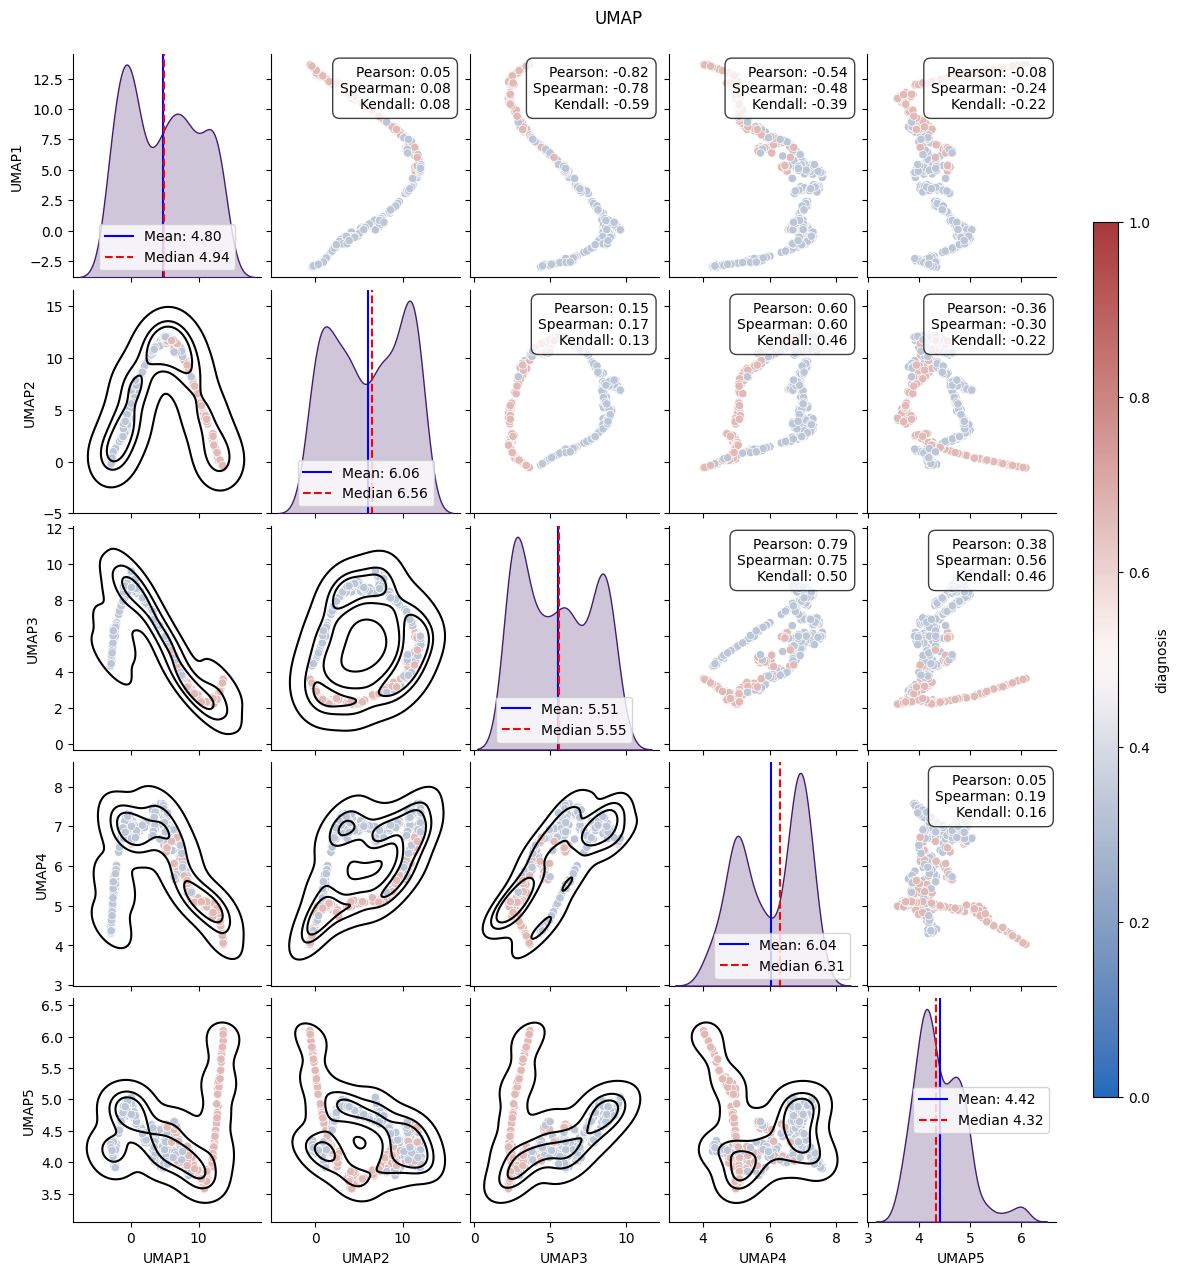

In [19]:
pairplot(
    data=dim_red(df, method="umap", n_components=5),
    title="UMAP",
    hue=target,
    cmap="vlag"
)